# 1. Importation des librairies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import spearmanr
import plotly.express as px
import geopy
from geopy.geocoders import Nominatim

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

## Paramétrage affichage des dataframe pandas
pd.options.display.max_columns = 200
pd.options.display.max_rows = 400

## Déactivation des avertissements
import warnings
warnings.filterwarnings("ignore")

## Choix du theme des graphiques
sns.set_style('ticks')
sns.set_context('poster', font_scale = 0.5)

## Affichage des graphiques dans le notebook
%matplotlib inline

# 2. Importation des données et compréhension des variables

#### 2A. Importation du dataset des Incidents

In [ ]:
# Lecture du fichier CSV et stockage des données dans un DataFrame appelé "incident"
incident = pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/LFB Incident data.csv", na_values=['nan'])

# Affichage du nombre de lignes et de colonnes dans le DataFrame
print("Le dataset des incidents comporte {} lignes et {} colonnes.".format(incident.shape[0], incident.shape[1]))

# Affichage des 3 premières lignes et des 3 dernières lignes du DataFrame
incident.head(3).append(incident.tail(3))

Le dataset des incidents comporte 1580629 lignes et 39 colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60.0,255.0,1.0
1,1091,01 Jan 2009,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60.0,255.0,2.0
1580626,077350-31052023,31 May 2023,2023,23:40:07,23,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,W3,0.000000e+00,21000610.0,E09000013,HAMMERSMITH AND FULHAM,Hammersmith And fulham,E05013753,WORMHOLT,WORMHOLT,NaN,NaN,521850,180250,NaN,NaN,London,Acton,337.0,Acton,388.0,Chiswick,2.0,2.0,2,60.0,388.0,1.0
1580627,077351-31052023,31 May 2023,2023,23:41:46,23,Special Service,Special Service,RTC,Road Vehicle,Motorcycle,In street outside gazetteer location,TW14 9QL,TW14,1.001565e+10,21501536.0,E09000018,HOUNSLOW,Hounslow,E05013614,FELTHAM WEST,FELTHAM WEST,509655.0,173151.0,509650,173150,51.446749,-0.423453,London,Feltham,328.0,Feltham,NaN,NaN,1.0,1.0,1,60.0,388.0,1.0
1580628,077354-31052023,31 May 2023,2023,23:56:16,23,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,SE13,0.000000e+00,22000483.0,E09000023,LEWISHAM,Lewisham,E05013725,LADYWELL,LADYWELL,NaN,NaN,537550,175750,NaN,NaN,London,Lewisham,275.0,Lewisham,381.0,Lewisham,2.0,2.0,2,60.0,388.0,1.0


#### 2B. Importation du dataset des Mobilisations

In [ ]:
# Lecture du fichier CSV et stockage des données dans un DataFrame appelé "mobilisation"
mobilisation = pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/LFB Mobilisation data.csv",na_values=['nan'])

# Affichage du nombre de lignes et de colonnes dans le DataFrame
print("Le dataset des mobilisations comporte {} lignes et {} colonnes.".format(mobilisation.shape[0],mobilisation.shape[1]))

# Affichage des 3 premières lignes et des 3 dernières lignes du DataFrame
mobilisation.head(3).append(mobilisation.tail(3))

Le dataset des mobilisations comporte 2167042 lignes et 22 colonnes.


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,01/01/2009 00:02:27,NaN,01/01/2009 00:07:46,NaN,NaN,319,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,253.0,89.0,342,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,151.0,157.0,308,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2167039,045041-01042023,2023,0,6336954,E371,1,31/03/2023 23:08:54,31/03/2023 23:10:21,31/03/2023 23:15:09,87.0,288.0,375,31/03/2023 23:18:59,NaN,E37,Peckham,Home Station,1,Initial,Initial Mobilisation,8.0,Traffic calming measures
2167040,045046-01042023,2023,0,6336955,H351,1,31/03/2023 23:41:48,31/03/2023 23:43:11,31/03/2023 23:48:30,83.0,319.0,402,01/04/2023 00:01:37,NaN,H35,Tooting,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
2167041,045050-01042023,2023,0,6336956,F451,1,31/03/2023 23:48:12,31/03/2023 23:49:23,31/03/2023 23:56:22,71.0,419.0,490,01/04/2023 00:20:48,NaN,F45,Plaistow,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up


#### 2C. Fusion des 2 datasets

In [ ]:
# Fusion des DataFrames "incident" et "mobilisation" sur les colonnes : "IncidentNumber","CalYear" et "HourOfCall"
dataset = pd.merge(incident, mobilisation, on=["IncidentNumber","CalYear","HourOfCall"], how="inner")

# Affichage du nombre de lignes et de colonnes dans le DataFrame fusionné
print("Le dataset comporte {} lignes et {} colonnes. Lors de la fusion, nous avons perdu {} lignes.".format(dataset.shape[0], dataset.shape[1],
                                                                                                           mobilisation.shape[0] - dataset.shape[0]))

# Affichage des 3 premières lignes et des 3 dernières lignes du DataFrame fusionné
dataset.head(3).append(dataset.tail(3))

Le dataset comporte 2142544 lignes et 58 colonnes. Lors de la fusion, nous avons perdu 24498 lignes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60.0,255.0,1.0,38426,H271,1,01/01/2009 00:02:27,NaN,01/01/2009 00:07:46,NaN,NaN,319,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60.0,255.0,1.0,38427,H212,2,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,253.0,89.0,342,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60.0,255.0,2.0,38429,A341,1,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,151.0,157.0,308,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2142541,045041-01042023,01 Apr 2023,2023,00:08:54,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,SE15,0.000000e+00,22500089.0,E09000028,SOUTHWARK,Southwark,E05011113,RYE LANE,RYE LANE,NaN,NaN,534150,175850,NaN,NaN,London,Peckham,375.0,Peckham,NaN,NaN,1.0,1.0,1,60.0,388.0,1.0,6336954,E371,1,31/03/2023 23:08:54,31/03/2023 23:10:21,31/03/2023 23:15:09,87.0,288.0,375,31/03/2023 23:18:59,NaN,E37,Peckham,Home Station,1,Initial,Initial Mobilisation,8.0,Traffic calming measures
2142542,045046-01042023,01 Apr 2023,2023,00:41:48,0,False Alarm,AFA,NaN,Non Residential,Warehouse,Within same building,SW17 0BA,SW17,1.007024e+10,22904311.0,E09000032,WANDSWORTH,Wandsworth,E05014027,WANDSWORTH COMMON,WANDSWORTH COMMON,525963.0,172018.0,525950,172050,51.433172,-0.189301,London,Tooting,402.0,Tooting,NaN,NaN,1.0,1.0,1,60.0,388.0,2.0,6336955,H351,1,31/03/2023 23:41:48,31/03/2023 23:43:11,31/03/2023 23:48:30,83.0,319.0,402,01/04/2023 00:01:37,NaN,H35,Tooting,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
2142543,045050-01042023,01 Apr 2023,2023,00:48:12,0,Special Service,Special Service,No action (not false alarm),Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E16,0.000000e+00,22208323.0,E09000025,NEWHAM,Newham,E05013923,ROYAL VICTORIA,ROYAL VICTORIA,NaN,NaN,541050,179850,Na

#### 2D. Création d'une copie du dataset

In [ ]:
# Création d'une copie indépendante du DataFrame "dataset"
df = dataset.copy()

# 3. Analyse de la forme du dataset

#### 3A. Information sur les variables du dataset

In [ ]:
# Affichage des informations sur le DataFrame
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142544 entries, 0 to 2142543
Data columns (total 58 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          2142544 non-null  object 
 1   DateOfCall                              2142544 non-null  object 
 2   CalYear                                 2142544 non-null  int64  
 3   TimeOfCall                              2142544 non-null  object 
 4   HourOfCall                              2142544 non-null  int64  
 5   IncidentGroup                           2142544 non-null  object 
 6   StopCodeDescription                     2142544 non-null  object 
 7   SpecialServiceType                      459549 non-null   object 
 8   PropertyCategory                        2142544 non-null  object 
 9   PropertyType                            2142544 non-null  object 
 10  AddressQualifier              

<b> NOTES :</b> <br>

Lors de la fusion de deux fichiers, nous obtenons :

- 16 colonnes de type float64
- 8 colonnes de type int64
- 34 colonnes de type object

Il est à noter que les colonnes de dates ne sont pas conformes au format attendu, ce qui nécessitera une étape de reformatage.

De plus, certaines variables, comme DelayCode_Description et SpecialServiceType, présentent un nombre significatif de valeurs manquantes.

#### 3B. Quantification des valeurs manquantes

In [ ]:
# Calcul du nombre de valeurs manquantes (NaN) pour chaque colonne
df_NaN = df.isna().sum().sort_values(ascending=False).to_frame(name="Count")

# Calcul du pourcentage de valeurs manquantes ppour chaque colonne
df_NaN["%NaN"] = round((100 * df.isna().sum() / df.shape[0]), 2)

# Affichage des variables avec un taux de NaN > à 0
df_NaN[df_NaN['%NaN']>0]

,Count,%NaN
SpecialServiceType,1682995,78.55
DelayCode_Description,1617308,75.49
DelayCodeId,1617308,75.49
DateAndTimeReturned,1186125,55.36
Postcode_full,1135608,53.00
Northing_m,1135608,53.00
Easting_m,1135608,53.00
Latitude,1135608,53.00
Longitude,1135608,53.00
SecondPumpArriving_DeployedFromStation,870184,40.61


<b> NOTES :</b> <br>
Notre analyse des valeurs manquantes (NaN) révèle que certaines variables contiennent un grand nombre de ces valeurs :

- La variable *SpecialServiceType* a de nombreuses valeurs manquantes, ce qui est normal car elle n’est remplie que pour les incidents de type “Spécial Service”.

- Nous supposons que la variable *DelayCodeDescription* n’est remplie que lorsque les pompiers sont en retard, d’où le nombre élevé de valeurs manquantes.

- Nous supprimerons dans les prochaines étapes les variables *DelayCodeId, DateAndTimeReturned, Easting_m, Postcode_full, Northing_m* car elles ont plus de 50% de valeurs manquantes.

- Malgré un taux de valeurs manquantes supérieur à 50%, nous avons choisi de conserver les variables Latitude et Longitude pour la réalisation d'une représentation cartographique. En partant sur ce principe, les variables USRN et UPRN nous sont inutiles.

#### 3C. Analyse rapide des variables numériques

In [ ]:
# Affichage des statistiques descriptives pour chaque colonne du DataFrame
df.describe().T.round(2)[["min", "mean", "max"]]

,min,mean,max
CalYear,2009.00,2.015700e+03,2.023000e+03
HourOfCall,0.00,1.349000e+01,2.300000e+01
UPRN,0.00,2.101535e+10,2.000044e+11
USRN,0.00,2.032021e+07,9.999042e+07
Easting_m,503582.00,5.305770e+05,5.609250e+05
Northing_m,155901.00,1.803759e+05,2.009060e+05
Easting_rounded,503550.00,5.305751e+05,5.609500e+05
Northing_rounded,155950.00,1.804994e+05,2.009500e+05
Latitude,0.00,5.146000e+01,5.169000e+01
Longitude,-0.51,-1.200000e-01,3.200000e-01


<b> NOTES :</b> <br>

- Sans surprise, on oberve grâce à la variable *CalYear* que nos données couvrent la période de 2009 à 2023.

- La variable *FirstPumpArriving_AttendanceTime* varie d'une seconde à 1200 secondes.

 - La variable *Attendance Time* est très similaire à la variable “FirstPumpArriving_AttendanceTime”.

  - Nos recherches nous ont permis de comprendre que la variable *Attendance Time* est la somme des variables *TurnoutTimeSeconds* et *TravelTimeSeconds*.

 - Pour ce projet, FirstPumpArriving_AttendanceTime sera notre variable cible.

- Il est également supprenant de voir une valeur maximale de 369 appels pour la variable *NumCalls*. Cette valeur est surement une valeur abbérantes.


#### 3D. Analyse rapide des variables qualitatitives

In [ ]:
# Affichage des statistiques descriptives pour les colonnes de type "objet"
df.describe(include=[object]).T.sort_values(by="freq",ascending=False)

,count,unique,top,freq
FRS,2142544,1,London,2142544
PlusCode_Description,2142544,3,Initial Mobilisation,2134674
PlusCode_Code,2142544,3,Initial,2134674
DeployedFromLocation,2141465,2,Home Station,2072121
PerformanceReporting,2142544,3,1,1423955
AddressQualifier,2142544,11,Correct incident location,1269125
IncidentGroup,2142544,3,False Alarm,1243427
PropertyCategory,2142544,9,Dwelling,1123548
StopCodeDescription,2142544,9,AFA,929460
DelayCode_Description,525236,10,Not held up,310472


<b> NOTES :</b> <br>
- Nous constatons que la variable *FRS* est constante et est égale à London pour l’ensemble des observations. Cette variable n’apporte donc aucune information discriminante et sera retirée dans les étapes ultérieures de notre analyse.


#### 3E. Analyse des doublons

In [ ]:
# Calcul du nombre de doublons
nombre_doublons = df.duplicated().sum()
print("Le dataset compte {} doublon(s)".format(nombre_doublons))

Le dataset compte 0 doublon(s)


# 4. Nettoyage des données

In [ ]:
# PumpOrder = ordre d'arrivée des véhicules sur l'incident.
# Nous allons nous concentrer sur le premier camion qui arrive sur le lieu de l'incident

df = df[df['PumpOrder']==1]
df.sample(5)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
413624,102795111,01 Jul 2011,2011,11:01:52,11,False Alarm,AFA,NaN,Non Residential,Purpose built office,Correct incident location,EC3A 5JX,EC3A,1.000229e+11,8100154.0,E09000001,CITY OF LONDON,City Of london,E05009289,Aldgate,Aldgate,533419.0,181207.0,533450,181250,51.514043,-0.078640,London,Whitechapel,261.0,Whitechapel,NaN,NaN,1.0,1.0,1,60.0,260.0,1.0,3718824,F332,1,01/07/2011 10:02:16,01/07/2011 10:04:03,01/07/2011 10:06:37,107.0,154.0,261,01/07/2011 10:20:24,01/07/2011 10:25:45,F33,Whitechapel,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1763865,001386-04012021,04 Jan 2021,2021,10:12:17,10,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,HA9,0.000000e+00,20202186.0,E09000005,BRENT,Brent,E05013497,Barnhill,Barnhill,NaN,NaN,519550,186450,NaN,NaN,London,Wembley,444.0,Wembley,NaN,NaN,1.0,1.0,1,60.0,346.0,2.0,5771125,G301,1,04/01/2021 10:12:17,04/01/2021 10:13:50,04/01/2021 10:19:41,93.0,351.0,444,04/01/2021 11:02:49,NaN,G30,Wembley,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"
1945928,028071-25022022,25 Feb 2022,2022,02:50:14,2,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E9,0.000000e+00,20900165.0,E09000012,HACKNEY,Hackney,E05009376,HOMERTON,HOMERTON,NaN,NaN,535150,184550,NaN,NaN,London,Homerton,563.0,Homerton,NaN,NaN,1.0,1.0,1,60.0,352.0,1.0,6036852,F281,1,25/02/2022 02:50:14,25/02/2022 02:51:16,25/02/2022 02:59:37,62.0,501.0,563,25/02/2022 03:07:51,NaN,F28,Homerton,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"
1223676,082055-22062017,22 Jun 2017,2017,16:25:22,16,Special Service,Special Service,No action (not false alarm),Dwelling,House - single occupancy,Correct incident location,NaN,DA7,0.000000e+00,20100189.0,E09000004,BEXLEY,Bexley,E05011219,Bexleyheath,Bexleyheath,NaN,NaN,549950,175950,NaN,NaN,London,Bexley,166.0,Bexley,NaN,NaN,1.0,1.0,1,60.0,328.0,1.0,4932911,E281,1,22/06/2017 15:25:22,22/06/2017 15:26:11,22/06/2017 15:28:08,49.0,117.0,166,22/06/2017 15:36:13,NaN,E28,Bexley,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1714617,114327-05092020,05 Sep 2020,2020,16:22:06,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,NW11 7NX,NW11,2.000423e+08,20015820.0,E09000003,BARNET,Barnet,E05013631,Childs Hill,Childs Hill,525133.0,187451.0,525150,187450,51.572054,-0.195755,London,West Hampstead,376.0,West Hampstead,NaN,NaN,1.0,1.0,1,60.0,346.0,1.0,5703258,A412,1,05/09/2020 15:22:06,05/09/2020 15:23:07,05/09/2020 15:28:22,61.0,315.0,376,05/09/2020 15:35:06,NaN,A41,West Hampstead,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"


#### 4A. Suppression des variables inutiles

In [ ]:
# Liste des colonnes à supprimer
drop_columns = [
    "IncidentNumber","IncidentStationGround","TimeOfCall", "Postcode_full", "Postcode_district","UPRN", "USRN", "IncGeo_BoroughCode", "ProperCase", "IncGeo_WardCode",
    "IncGeo_WardNameNew","Easting_m", "Northing_m", "Easting_rounded", "Northing_rounded", "FRS","AttendanceTimeSeconds", "SecondPumpArriving_AttendanceTime",
    "PumpMinutesRounded","Notional Cost (£)", "FirstPumpArriving_DeployedFromStation","ResourceMobilisationId","PerformanceReporting", "DateAndTimeMobilised", "DateAndTimeMobile",
    "DateAndTimeArrived","DateAndTimeLeft", "DateAndTimeReturned", "PlusCode_Description", "DeployedFromStation_Code", "PumpOrder","PlusCode_Code", "DelayCodeId", "PumpCount",
]

# Suppression des colonnes et affichage
df.drop(drop_columns, axis=1, inplace=True)

df.head()

,DateOfCall,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncGeo_BoroughName,IncGeo_WardName,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,Resource_Code,TurnoutTimeSeconds,TravelTimeSeconds,DeployedFromStation_Name,DeployedFromLocation,DelayCode_Description
0,01 Jan 2009,2009,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,WANDSWORTH,Battersea Park,51.475812,-0.148894,319.0,Clapham,2.0,2.0,1.0,H271,NaN,NaN,Battersea,Home Station,NaN
2,01 Jan 2009,2009,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,ENFIELD,Haselbury,51.633342,-0.068488,308.0,NaN,1.0,1.0,2.0,A341,151.0,157.0,Edmonton,Home Station,NaN
3,01 Jan 2009,2009,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,HILLINGDON,Hillingdon East,51.533882,-0.448089,210.0,NaN,1.0,1.0,2.0,G232,108.0,102.0,Hillingdon,Home Station,NaN
4,01 Jan 2009,2009,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,ISLINGTON,Laycock,51.551441,-0.111120,233.0,Holloway,1.0,2.0,1.0,A311,114.0,119.0,Holloway,Home Station,NaN
6,01 Jan 2009,2009,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,CAMDEN,Kentish Town North,NaN,NaN,172.0,Kentish Town,1.0,2.0,1.0,A432,83.0,89.0,Kentish Town,Home Station,NaN


#### 4B. Changement type de variables

In [ ]:
# Conversion de la colonne "DateOfCall" en format datetime
df["DateOfCall"] = pd.to_datetime(df["DateOfCall"])

#### 4C. Gestion des valeurs manquantes

In [ ]:
nombre_valeurs_manquantes = df.isna().sum().sort_values(ascending=False)
print(nombre_valeurs_manquantes)

SpecialServiceType                        1027503
DelayCode_Description                     1016690
SecondPumpArriving_DeployedFromStation     870174
Latitude                                   673804
Longitude                                  673804
TravelTimeSeconds                           20723
TurnoutTimeSeconds                          20641
NumCalls                                      961
DeployedFromLocation                          571
DeployedFromStation_Name                       11
FirstPumpArriving_AttendanceTime                6
IncGeo_WardName                                 3
StopCodeDescription                             0
NumPumpsAttending                               0
Resource_Code                                   0
HourOfCall                                      0
NumStationsWithPumpsAttending                   0
PropertyCategory                                0
CalYear                                         0
IncidentGroup                                   0


In [ ]:
# Recopie des infos de la colonne SpecialServiceType directement dans la variable StopCodeDescription
df['StopCodeDescription'] = df.apply(lambda x: x.SpecialServiceType if x.StopCodeDescription == "Special Service" else x.StopCodeDescription, axis=1)

# Suppression de la colonne SpecialServiceType
df.drop("SpecialServiceType",axis=1,inplace=True)

# Sélection des trois ligne avec IncidentGroup = "Special Service"
df.loc[df["IncidentGroup"]=="Special Service"][:3]

,DateOfCall,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,IncGeo_BoroughName,IncGeo_WardName,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,Resource_Code,TurnoutTimeSeconds,TravelTimeSeconds,DeployedFromStation_Name,DeployedFromLocation,DelayCode_Description
0,2009-01-01,2009,0,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,WANDSWORTH,Battersea Park,51.475812,-0.148894,319.0,Clapham,2.0,2.0,1.0,H271,NaN,NaN,Battersea,Home Station,NaN
8,2009-01-01,2009,0,Special Service,RTC,Road Vehicle,Car,On motorway / elevated road,GREENWICH,Kidbrooke Village & Sutcliffe,51.462211,0.029557,522.0,NaN,1.0,1.0,1.0,E231,119.0,403.0,East Greenwich,Home Station,Not held up
13,2009-01-01,2009,0,Special Service,Flooding,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,SOUTHWARK,St. Giles,NaN,NaN,256.0,NaN,1.0,1.0,1.0,E372,NaN,NaN,Peckham,Home Station,NaN


In [ ]:
# Remplacement des valeurs manquantes de la colonne DelayCode_Description par "No Delay"
df["DelayCode_Description"].fillna(value="No Delay",inplace=True)

df["DelayCode_Description"].replace("Not held up","No Delay",inplace=True)

# Remplacement des valeurs manquantes de la colonne SecondPumpArriving_DeployedFromStation par "No Second pump deloyed"
df["SecondPumpArriving_DeployedFromStation"].fillna(value="No Second pump deloyed",inplace=True)

# Recalcul du nombre de valeurs manquantes dans chaque colonne, trié par ordre décroissant
df.isna().sum().sort_values(ascending=False)

Longitude                                 673804
Latitude                                  673804
TravelTimeSeconds                          20723
TurnoutTimeSeconds                         20641
NumCalls                                     961
DeployedFromLocation                         571
DeployedFromStation_Name                      11
FirstPumpArriving_AttendanceTime               6
IncGeo_WardName                                3
SecondPumpArriving_DeployedFromStation         0
Resource_Code                                  0
NumPumpsAttending                              0
NumStationsWithPumpsAttending                  0
DateOfCall                                     0
CalYear                                        0
IncGeo_BoroughName                             0
AddressQualifier                               0
PropertyType                                   0
PropertyCategory                               0
StopCodeDescription                            0
IncidentGroup       

In [ ]:
# Suppression des lignes contenant des valeurs manquantes
df.dropna(inplace=True)

# Affichage du nombre de lignes
print("Nombre de lignes dans le dataset : ",df.shape[0])

# Affichage du nombre total de valeurs manquantes
print("Nombre de valeurs manquantes: ", df.isna().sum().sum())

Nombre de lignes dans le dataset :  735443
Nombre de valeurs manquantes:  0


#### 4D. Uniformisation du nommage des variables

In [ ]:
# Création d'un dictionnaire pour renommer les colonnes
nom_columns = {
  "HourOfCall_x" : "HourOfCall",
  "StopCodeDescription":"IncidentGroupType",
  "IncGeo_BoroughName":"BoroughName",
  "Easting_rounded" : "Easting",
  "IncGeo_WardName" : "WardName",
  "Northing_rounded":"Northing",
  "Latitude": "LatitudeIncident",
  "Longitude":"LongitudeIncident",
  "Resource_Code":"ResourceCode",
  "SecondPumpArriving_DeployedFromStation":"SecondPumpArrivingDeployedFromStation",
  "TurnoutTimeSeconds":"TurnoutTime",
  "TravelTimeSeconds":"TravelTime",
  "FirstPumpArriving_AttendanceTime":"AttendanceTime",
  "DeployedFromStation_Name":"DeployedFromStationName",
  "DelayCode_Description":"DelayCodeDescription",

}

# Renommage des colonnes  en utilisant le dictionnaire nom_columns
df.rename(nom_columns,axis=1,inplace=True)

# Affichage des trois premières lignes
df.sample(2)

,DateOfCall,CalYear,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,AttendanceTime,SecondPumpArrivingDeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,ResourceCode,TurnoutTime,TravelTime,DeployedFromStationName,DeployedFromLocation,DelayCodeDescription
136648,2009-10-08,2009,15,False Alarm,AFA,Other Residential,Nursing/Care Home/Hospice,Within same building,ENFIELD,Bush Hill Park,51.643848,-0.079560,416.0,No Second pump deloyed,2.0,3.0,2.0,A351,9.0,407.0,Enfield,Home Station,No Delay
1459669,2019-01-03,2019,20,False Alarm,AFA,Non Residential,Other education establishment,Correct incident location,NEWHAM,Stratford,51.539846,0.004444,198.0,No Second pump deloyed,1.0,1.0,2.0,F211,65.0,133.0,Stratford,Home Station,No Delay


In [ ]:
# Modification de l'écriture des variables BoroughName et WardName
df["BoroughName"] = df["BoroughName"].str.capitalize()
df['WardName'] = df['WardName'].apply(lambda x: ' '.join([word.capitalize() for word in str(x).split()]))

In [ ]:
# Uniformisation les noms des arrondissements
df["BoroughName"].replace(to_replace =["Kingston upon thames","Waltham forest","Richmond upon thames" ,"Hammersmith and fulham","Kensington and chelsea",
                                                 "Tower hamlets","Barking and dagenham","City of london"],value=["Kingston upon Thames","Waltham Forest",
                                                                                                                 "Richmond upon Thames","Hammersmith and Fulham",
                                                                                                                 "Kensington and Chelsea","Tower Hamlets","Barking and Dagenham","City of London"],inplace=True)

#### 4E. Conversion des temps en minutes

In [ ]:
# Conversion des temps en minutes
columns = ["TurnoutTime","TravelTime","AttendanceTime"]
for col in columns :
    df[col] = round(df[col]/60,2)

df.head().append(df.tail())

,DateOfCall,CalYear,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,AttendanceTime,SecondPumpArrivingDeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,ResourceCode,TurnoutTime,TravelTime,DeployedFromStationName,DeployedFromLocation,DelayCodeDescription
2,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor,Road surface/pavement,In street outside gazetteer location,Enfield,Haselbury,51.633342,-0.068488,5.13,No Second pump deloyed,1.0,1.0,2.0,A341,2.52,2.62,Edmonton,Home Station,No Delay
3,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Hillingdon,Hillingdon East,51.533882,-0.448089,3.50,No Second pump deloyed,1.0,1.0,2.0,G232,1.80,1.70,Hillingdon,Home Station,No Delay
4,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,Islington,Laycock,51.551441,-0.111120,3.88,Holloway,1.0,2.0,1.0,A311,1.90,1.98,Holloway,Home Station,No Delay
8,2009-01-01,2009,0,Special Service,RTC,Road Vehicle,Car,On motorway / elevated road,Greenwich,Kidbrooke Village & Sutcliffe,51.462211,0.029557,8.70,No Second pump deloyed,1.0,1.0,1.0,E231,1.98,6.72,East Greenwich,Home Station,No Delay
9,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor Structure,Refuse/rubbish tip,On land associated with building,Hounslow,Hounslow South,51.461560,-0.352783,5.70,Heston,1.0,2.0,1.0,G381,2.97,2.73,Heston,Home Station,No Delay
2142534,2023-04-01,2023,0,False Alarm,AFA,Other Residential,Student Hall of Residence,Correct incident location,Greenwich,East Greenwich,51.486694,0.015330,2.40,Greenwich,2.0,2.0,1.0,E231,1.30,1.10,East Greenwich,Home Station,No Delay
2142536,2023-04-01,2023,0,Special Service,Other Transport incident,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,Bromley,Bickley & Sundridge,51.399132,0.055816,10.48,No Second pump deloyed,1.0,1.0,1.0,E392,2.08,8.40,Bromley,Home Station,No Delay
2142538,2023-04-01,2023,0,False Alarm,AFA,Non Residential,Airport building (not terminal or hangar),Nearby address - no building in street,Hillingdon,Heathrow Villages,51.468682,-0.489819,7.47,No Second pump deloyed,1.0,1.0,1.0,G561,0.45,7.02,Heathrow,Home Station,No Delay
2142539,2023-04-01,2023,0,Fire,Primary Fire,Road Vehicle,Car,In street outside gazetteer location,Haringey,Tottenham Central,51.590500,-0.072760,4.60,Stoke Newington,2.0,2.0,5.0,A331,1.82,2.78,Tottenham,Home Station,No Delay
2142542,2023-04-01,2023,0,False Alarm,AFA,Non Residential,Warehouse,Within same building,Wandsworth,Wandsworth Common,51.433172,-0.189301,6.70,No Second pump deloyed,1.0,1.0,2.0,H351,1.38,5.32,Tooting,Home Station,No Delay


#### 4F. Regroupement des données

1) Regroupement des types d'incidents

In [ ]:
assistance = ["Animal assistance incidents", "Assist other agencies", "Removal of objects from people", "Making Safe (not RTC)", "Stand By"]
rescue = ["Other rescue/release of persons", "Suicide/attempts", "Evacuation (no fire)", "Rescue or evacuation from water"]
transport = ["Lift Release", "Other Transport incident"]
advice = ["Advice Only", "No action (not false alarm)"]
medical = ["Medical Incident", "Medical Incident - Co-responder"]
environment = ["Flooding", "Spills and Leaks (not RTC)", "Hazardous Materials incident", "Water provision"]

df["IncidentGroupType"].replace(assistance, "Assistance", inplace = True)
df["IncidentGroupType"].replace(rescue, "Rescue", inplace = True)
df["IncidentGroupType"].replace(transport, "Transport", inplace = True)
df["IncidentGroupType"].replace(advice, "Advice", inplace = True)
df["IncidentGroupType"].replace(medical, "Medical", inplace = True)
df["IncidentGroupType"].replace(environment, "Environment", inplace = True)

pd.DataFrame(df.groupby(["IncidentGroup","IncidentGroupType"]).size(),columns=["Nombre de lignes"])

Nombre de lignes
IncidentGroup   IncidentGroupType                          
False Alarm     AFA                                  318841
                False alarm - Good intent             73447
                False alarm - Malicious                9298
Fire            Chimney Fire                             51
                Late Call                                53
                Primary Fire                          62605
                Secondary Fire                       135621
Special Service Advice                                11276
                Assistance                            16981
                Effecting entry/exit                  12388
                Environment                           23565
                Medical                                2855
                RTC                                   51445
                Rescue                                 5227
                Transport                             11790

2) Uniformisation du nommage des valeurs de la variable IncidentGroupType

In [ ]:
dictionnaire = {
    'RTC': 'Special Service - Road Traffic Collision',
    'Secondary Fire': 'Fire - Secondary Fire',
    'AFA': 'False Alarm - Automatic Fire Alarm',
    'False alarm - Good intent': 'False alarm - Good intent',
    'Primary Fire': 'Fire - Primary Fire',
    'Rescue': 'Special Service - Rescue',
    'Assistance': 'Special Service - Assistance',
    'False alarm - Malicious': 'False alarm - Malicious',
    'Advice': 'Special Service - Advice',
    'Environment': 'Special Service - Environment',
    'Effecting entry/exit': 'Special Service - Effecting entry/exit',
    'Transport': 'Special Service - Transport',
    'Medical': 'Special Service - Medical',
    'Late Call': 'Fire - Late Call',
    'Chimney Fire': 'Fire - Chimney Fire'
}

df["IncidentGroupType"] = df["IncidentGroupType"].replace(dictionnaire)
df.sample(5)

,DateOfCall,CalYear,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,AttendanceTime,SecondPumpArrivingDeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,ResourceCode,TurnoutTime,TravelTime,DeployedFromStationName,DeployedFromLocation,DelayCodeDescription
237985,2010-05-26,2010,18,Fire,Fire - Secondary Fire,Outdoor Structure,Small refuse/rubbish container,In street close to gazetteer location,Bromley,Mottingham,51.422916,0.049449,7.20,No Second pump deloyed,1.0,1.0,3.0,E321,2.07,5.13,Downham,Home Station,Address incomplete/wrong
430859,2011-08-09,2011,7,Fire,Fire - Secondary Fire,Outdoor,Loose refuse,In street outside gazetteer location,Tower Hamlets,St. Dunstan's,51.520807,-0.046643,4.10,No Second pump deloyed,1.0,1.0,1.0,F261,0.87,3.23,Bethnal Green,Home Station,No Delay
507454,2012-02-11,2012,10,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Pre School/nursery,Correct incident location,Camden,Belsize,51.548539,-0.179578,5.58,No Second pump deloyed,1.0,1.0,1.0,A411,2.02,3.57,West Hampstead,Home Station,No Delay
1334224,2018-03-13,2018,13,Special Service,Special Service - Rescue,Non Residential,Pre School/nursery,Correct incident location,Greenwich,Eltham Page,51.462348,0.042895,5.22,No Second pump deloyed,1.0,1.0,1.0,E301,0.60,4.62,Eltham,Home Station,No Delay
183193,2010-01-19,2010,10,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Secondary school,Correct incident location,Wandsworth,Roehampton,51.454540,-0.252410,6.43,No Second pump deloyed,1.0,1.0,1.0,H331,1.40,5.03,Wandsworth,Home Station,Weather conditions


<b> NOTES :</b> <br>
- Pour chaque valeur dans la variable *IncidentGroupType*, si la valeur correspond à une clé dans le dictionnaire, elle est remplacée par la valeur associée à cette clé. Le but de cette opération est de standardiser ou de renommer les types d'incidents dans la colonne *IncidentGroupType* en utilisant les nouvelles catégories spécifiées dans le dictionnaire.


3) Regroupement des types de propriété

In [ ]:
residential = ["Dwelling", "Other Residential"]
vehicle = ["Road Vehicle", "Aircraft", "Boat", "Rail Vehicle"]
outdoor = ["Outdoor","Outdoor Structure"]

df["PropertyCategory"].replace(residential, "Residential", inplace = True)
df["PropertyCategory"].replace(vehicle, "Vehicle", inplace = True)
df["PropertyCategory"].replace(outdoor, "Outdoor", inplace = True)

4) Standardisation des Catégories de Propriété pour les Propriétés Non Résidentielles

In [ ]:
#Suppression des espaces
df["PropertyType"] = df["PropertyType"].str.strip()

In [ ]:
religious_Building = ["Other Religious Use Building","Cathedral","Church/Chapel","Synagogue","Temple","Mosque"]

animal_esta = ["Other animal boarding/breeding establishment","Animal boarding/breeding establishment - dogs","Animal boarding/breeding establishment - cats"]

storage = ["Other bulk storage","Bulk gas storage","Bulk hazardous materials storage","Bulk oil storage","Bulk waste storage","Silo","Tractor Shed"]


parking = ["Other car park structure","Underground car park","Multi-Storey car park"]


education =["Other education establishment","College/University","Infant/Primary school","Secondary school","Pre School/nursery"]


entertainment = ["Casino","Bingo Hall","Art Gallery","Theme Park","Theatre","Other entertainment venue","Cinema","Club/night club","Concert Hall","Exhibition Centre",
                 "Golf clubhouse","Museum","Pub/wine bar/bar","Restaurant/cafe","Sports/Social club","Ice rink","Zoo"]


sports = ["Other outdoor sporting venue","Other indoor sporting venue","Athletics Stadium","Cricket ground","Gym","Football stadium","Greyhound stadium",
          "Rugby Stadium","Sports Hall","Swimming Pool","Sports pavilion/shower block/changing facility","Tennis Courts","Racecourse","Indoor stadium","Motor racing circuit"]


industry = ["Other industrial processing plant","Animal products processing plant","Chemical plant","DIY Warehouse","Distillery plant","Electrical warehouse",
            "Electricity power station","Engineering manufacturing plant","Factory","Other industrial manufacturing facility" ,"Other retail warehouse",
            "Food and drink processing","Furniture warehouse" ,"Gas works","Intensive Farming Sheds (chickens/ pigs etc)" ,"Manufacturing assembly plant",
            "Warehouse" ,"Recycling plant" ,"Oil refinery","Mill","Sewage works" ,"Water works","Milking Parlour","Mine or quarry building above ground"]


medical = ["Other medical establishment (including surgery)","Day care/Drop in centre","Dental surgery","Doctors surgery","Health Centre",
           "Health spa/farm","Hospital","Medical/health centre","Veterinary surgery","Laboratory/research Establishment"]


public = ["Other building/use not known","Travel Agent","Other office/call centre type building","Ambulance station","Bus/coach station/garage" ,"Community centre/Hall","Conference Centre" ,
          "Converted office","Fire station","Town Hall","Ministry of Defence office","Printing works","Prison","Purpose built office",
          "TV/film/music/art studio" ,"Temporary office (eg portacabin)","Young offenders unit","Other private non-residential building","Barn",
          "Central Government Office","Greenhouse (commercial) glass","Local Government Office","Other public building","Call Centre","Estate Agent" ,
          "Library","Law Courts","Post office (purpose built)","Post office (within other shop/premises)","Police station","Petrol station","Public toilets",
          "Leisure Centre","Telephone exchange","Other cultural venue","Laundrette","Other public utility works" ,"Bank/Building Society","Greenhouse (commercial) polytunnel"]


retail = ["Other retail","Bakery" ,"Department Store" ,"Indoor Market" ,"Large supermarket","Hairdresser","Shopping Centre" ,"Single shop","Takeaway/ fast food","Other agricultural building"]


transport = ["Other transport building" ,"Airport - fuel storage" ,"Airport - hangar","Airport - terminal" ,"Ferry terminal","Airport building (not terminal or hangar)" ,
             "Train station - platform (at ground level or elevated)","Train station - platform (below ground)" ,"Trains - engine shed",
             "Vehicle Repair Workshop","Vehicle sales building","Train station - concourse","Train station - elsewhere","Docks","Railway building - other"]


Private_Outdoor_Structures = ["Private Garden Shed","Private Summer house","Private garage","Private greenhouse"]


df["PropertyType"].replace(religious_Building, "Religious Building", inplace = True)
df["PropertyType"].replace(animal_esta, "Animal Establishment", inplace = True)
df["PropertyType"].replace(storage, "Storage", inplace = True)
df["PropertyType"].replace(parking, "Parking", inplace = True)
df["PropertyType"].replace(education, "Education", inplace = True)
df["PropertyType"].replace(entertainment, "Entertainment", inplace = True)
df["PropertyType"].replace(sports, "Sports", inplace = True)
df["PropertyType"].replace(industry, "Industry", inplace = True)
df["PropertyType"].replace(medical, "Medical", inplace = True)
df["PropertyType"].replace(public, "Public", inplace = True)
df["PropertyType"].replace(retail, "Retail", inplace = True)
df["PropertyType"].replace(transport, "Transport", inplace = True)
df["PropertyType"].replace(Private_Outdoor_Structures, "Private Outdoor Structures", inplace = True)

In [ ]:
df["PropertyType2"] = df["PropertyCategory"].astype(str) + " - " + df["PropertyType"].astype(str)
df.drop(["PropertyType"],axis=1,inplace=True)

df.rename(columns={"PropertyType2": "PropertyType"}, inplace=True)

In [ ]:
pd.DataFrame(df["PropertyType"].value_counts())

,PropertyType
Non Residential - Public,95612
Vehicle - Car,66558
Non Residential - Retail,57643
Non Residential - Education,46773
Non Residential - Medical,43512
Outdoor - Small refuse/rubbish container,39244
Non Residential - Entertainment,32819
Residential - Retirement/Old Persons Home,26319
Non Residential - Industry,24367
Outdoor - Loose refuse,24077


<b> NOTES :</b> <br>
- Ici, nous avons standardisé les catégories de propriétés pour les propriétés non résidentielles dans la colonne *PropertyType* du DataFrame. Notre objectif est de regrouper des catégories spécifiques sous des catégories plus générales afin de simplifier l’analyse et la compréhension des données. Ainsi, différentes catégories, comme les bâtiments religieux et les établissements pour animaux, sont regroupées sous des catégories plus larges, telles que "religious_Building" et "animal_esta"

5) Catégorisation des Propriétés de Type 'Outdoor'

In [ ]:
outdoor_equipment = ["Other outdoor equipment/machinery","Agricultural equipment","Barbecue","Cables","Fence","Garden equipment",
                     "Large refuse/rubbish container (eg skip/ paladin)","Outdoor storage","Pipe or drain","Post box","Railings",
                     "Recycling collection point/ bottle bank","Roadside furniture (eg lamp posts/ road signs/ telegraph poles/ speed cameras)",
                     "Small refuse/rubbish container","Wheelie bin (domestic size)"]

tent_shelter = ["Other tent/marquee","Camping tent","Shelter"]

harm_outdoors = ["Human harm outdoors","Animal harm outdoors"]

natural_location = ["Beach","Bridge","Cemetery","Park","Canal/riverbank vegetation","Cycle path/public footpath/bridleway",
                    "Domestic garden (vegetation not equipment)","Golf course (not building on course)",
                    "Grassland/ pasture/ grazing etc","Heathland","Lake/pond/reservoir","Loose refuse",
                    "Playground/Recreation area (not equipment)","River/canal","Roadside vegetation","Scrub land",
                    "Stacked/baled crop","Standing crop","Straw/stubble burning","Tree scrub","Wasteland",
                    "Woodland/forest - broadleaf/hardwood","Woodland/forest - conifers/softwood","Sea"]

manmade_location = ["Other outdoor location","Common external bin storage area","Railway","Tunnel/ subway","Refuse/rubbish tip",
                    "Kiosk","Mine or quarry (not above ground building)","Other outdoor structures","Airfield/runway",
                    "Nurseries/ market garden","Railway goods yard","Railway trackside vegetation","Road surface/pavement","Landfill site"]


df["PropertyType"].replace(outdoor_equipment, "Outdoor Equipment", inplace = True)
df["PropertyType"].replace(tent_shelter, "Tent/Shelter", inplace = True)
df["PropertyType"].replace(harm_outdoors, "Harm Outdoors", inplace = True)
df["PropertyType"].replace(natural_location, "Natural Location", inplace = True)
df["PropertyType"].replace(manmade_location, "Manmade Location", inplace = True)

<b> NOTES :</b> <br>
- Nous avons également catégorisé les propriétés de type ‘Outdoor’ de la
colonne ‘PropertyType’ en regroupant différentes catégories sous des catégories plus générales.

6) Classification des Propriétés Résidentielles

In [ ]:
flat = ["Other Dwelling","Converted Flat/Maisonette - Up to 2 storeys" ,"Converted Flat/Maisonettes - 3 or more storeys" ,
        "Purpose Built Flats/Maisonettes - 10 or more storeys","Purpose Built Flats/Maisonettes - 4 to 9 storeys",
        "Purpose Built Flats/Maisonettes - Up to 3 storeys"]


house = ["House - single occupancy","Self contained Sheltered Housing","Sheltered Housing : not self contained"]


special = ["Bungalow - single occupancy","Caravan/Mobile home (permanent dwelling)","Houseboat (permanent dwelling)" ,"Towing caravan/Camper van on site",
           "Castle (part not open to public)"]


multiple_occupancy_house = ["House in Multiple Occupation - 3 or more storeys (not known if licensed)",
                            "House in Multiple Occupation - Up to 2 storeys (not known if licensed)","Licensed House in Multiple Occupation - 3 or more storeys",
                            "Licensed House in Multiple Occupation - Up to 2 storeys","Unlicensed House in Multiple Occupation - 3 or more storeys",
                            "Unlicensed House in Multiple Occupation - Up to 2 storeys"]


residential_home = ["Other Residential Home","Boarding House/B&B for homeless/asylum seekers","Boarding House/B&B other","Boarding School accommodation",
                    "Children's Home","Hostel (e.g. for homeless people)","Hotel/motel","Military/barracks","Monastery/convent",
                    "Nurses'/Doctors' accommodation","Nursing/Care Home/Hospice","Retirement/Old Persons Home","Royal Palace (part not open to public)",
                    "Stately Home (part not open to public)","Student Hall of Residence","Tenement Building","Youth hostel"]


df["PropertyType"].replace(flat, "Flat", inplace = True)
df["PropertyType"].replace(house, "House", inplace = True)
df["PropertyType"].replace(special, "Special Home", inplace = True)
df["PropertyType"].replace(multiple_occupancy_house, "Multiple Occupancy House", inplace = True)
df["PropertyType"].replace(residential_home, "Residential Home", inplace = True)

<b> NOTES :</b> <br>
- Même opération pour la colonne "PropertyType".

7) Classification des Propriétés de Type 'Véhicule

In [ ]:
aircraft = ["Other aircraft","Freight plane ","Passenger plane","Freight plane","Helicopter","Light aircraft","Military helicopter","Military plane"]

road_vehicle = ["Other road vehicle","Agricultural vehicle","Bicycle","Bus/coach","Car","Caravan on tow","Lorry/HGV","Minibus","Motor Home","Motorcycle",
                "Multiple Vehicles","Road Tanker","Towing caravan (not on tow or on site)","Trailer (not attached to tractor unit)","Van"]

rail_vehicle = ["Passenger Train (national rail network)","Train on Tube network","Underground train : Other system","Freight Train","Tram"]

water_vessel = ["Other vessel" ,"Barge","Large passenger vessel","Motor yacht","Boat - Tanker","Fishing boat","Naval vessel","Other merchant vessel"]


df["PropertyType"].replace(aircraft, "Aircraft", inplace = True)
df["PropertyType"].replace(road_vehicle, "Road Vehicle", inplace = True)
df["PropertyType"].replace(rail_vehicle, "Rail Vehicle", inplace = True)
df["PropertyType"].replace(water_vessel, "Water Vessel", inplace = True)

<b> NOTES :</b> <br>
- Les types de véhicules tels que les avions, les véhicules sur routes et rails et les navires sont regroupés. Cette classification simplifie la représentation des données et facilite une analyse plus claire des propriétés liées aux véhicules.

8) Simplification de la description des adresses


In [ ]:
street = ["In street outside gazetteer location", "In street remote from gazetteer location", "In street close to gazetteer location"]

open_land = ["Open land/water - nearest gazetteer location"]

nearby = ["Nearby address - no building in street", "Nearby address - street not listed in gazetteer"]

motorway = ["On motorway / elevated road"]

railway = ["Railway land or rolling stock"]

df["AddressQualifier"].replace(street, "Street", inplace = True)
df["AddressQualifier"].replace(open_land, "Open Land/Water", inplace = True)
df["AddressQualifier"].replace(nearby, "Nearby Address", inplace = True)
df["AddressQualifier"].replace(motorway, "Motorway / elevated road", inplace = True)
df["AddressQualifier"].replace(railway, "Railway / rolling stock", inplace = True)

pd.DataFrame(df["AddressQualifier"].value_counts())

,AddressQualifier
Correct incident location,315264
Street,170125
Within same building,111090
On land associated with building,79259
Open Land/Water,40341
Nearby Address,13022
Motorway / elevated road,4640
Railway / rolling stock,1702


<b> NOTES :</b> <br>
- Même opération pour la colonne "AddressQualifier".

#### 4G. Vérification association WardName Borough

In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/Datasets/Correspondance.xlsx")
df2.head()

,WardName,Borough
0,Abbey,Barking and Dagenham
1,Alibon,Barking and Dagenham
2,Barking Riverside,Barking and Dagenham
3,Beam,Barking and Dagenham
4,Becontree,Barking and Dagenham


1) Vérification de la Correspondance des Clés entre Deux DataFrames df et df2.

In [ ]:
# Création d'une clé unique dans chaque dataframe qui est une combinaison de 'BoroughName' et 'WardName'
df['key'] = df['BoroughName'] + df['WardName']
df2['key'] = df2['Borough'] + df2['WardName']

# Création d'une série à partir de df2 avec 'key' comme valeurs
s = df2['key']

# Utilisation de la méthode isin pour vérifier si chaque 'key' dans df1 est dans df2
df['is_key_correct'] = df['key'].isin(s)

<b> NOTES :</b> <br>
- Il s'agit de nous assurer de la cohérence des données entre les deux ensembles de données basées sur des clés spécifiques, telles que le nom du district ('Borough') et le nom du quartier ('Ward').

2) Filtrage des Données avec des Clés Correspondantes et Suppression de Colonnes Redondantes

In [ ]:
# Récupération du dataframe avec les is_key_correct positifs
df = df[df['is_key_correct']]

#Supression de colonne key et is_key_correct
df.drop(["key","is_key_correct"],axis=1,inplace=True)

#### 4H. Réorganisation des colonnes

In [ ]:
df = df[['AttendanceTime', 'DateOfCall', 'HourOfCall','IncidentGroup', 'IncidentGroupType', 'PropertyCategory', 'PropertyType', 'AddressQualifier',
    'BoroughName', 'WardName', 'LatitudeIncident', 'LongitudeIncident','DeployedFromStationName', 'DeployedFromLocation', 'NumStationsWithPumpsAttending','NumPumpsAttending',
         'SecondPumpArrivingDeployedFromStation','NumCalls', 'ResourceCode','TurnoutTime','TravelTime','DelayCodeDescription']]
df.head()

,AttendanceTime,DateOfCall,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,NumPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,TurnoutTime,TravelTime,DelayCodeDescription
2,5.13,2009-01-01,0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Road surface/pavement,Street,Enfield,Haselbury,51.633342,-0.068488,Edmonton,Home Station,1.0,1.0,No Second pump deloyed,2.0,A341,2.52,2.62,No Delay
3,3.50,2009-01-01,0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Domestic garden (vegetation not equi...,On land associated with building,Hillingdon,Hillingdon East,51.533882,-0.448089,Hillingdon,Home Station,1.0,1.0,No Second pump deloyed,2.0,G232,1.80,1.70,No Delay
4,3.88,2009-01-01,0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Cycle path/public footpath/bridleway,Street,Islington,Laycock,51.551441,-0.111120,Holloway,Home Station,1.0,2.0,Holloway,1.0,A311,1.90,1.98,No Delay
8,8.70,2009-01-01,0,Special Service,Special Service - Road Traffic Collision,Vehicle,Vehicle - Car,Motorway / elevated road,Greenwich,Kidbrooke Village & Sutcliffe,51.462211,0.029557,East Greenwich,Home Station,1.0,1.0,No Second pump deloyed,1.0,E231,1.98,6.72,No Delay
9,5.70,2009-01-01,0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Refuse/rubbish tip,On land associated with building,Hounslow,Hounslow South,51.461560,-0.352783,Heston,Home Station,1.0,2.0,Heston,1.0,G381,2.97,2.73,No Delay


In [ ]:
print("Nombre de doublons avant : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Nombre de doublons après : ", df.duplicated().sum())

Nombre de doublons avant :  1
Nombre de doublons après :  0


In [ ]:
df.to_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_NettoyageOK.csv", encoding='utf-8', index=False)

#### 4I. Création d'une fonction qui permet de diviser le dataframe selon le type de variable

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/df_NettoyageOK.csv",index_col="DateOfCall",parse_dates=True)

In [ ]:
def split_int_cat (data):

    #Recherche les variables numériques
    int_var = data.select_dtypes(include = np.number)

    #Recherche les variables catégorielles
    cat_var = data.select_dtypes(exclude=np.number)

    return int_var, cat_var

int_var = split_int_cat(df)[0] # Sélectionne les variables numériques
cat_var = split_int_cat(df)[1] # Sélectionne les variables catégorielles

cat_var.sample(1)

,DateOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,DeployedFromStationName,DeployedFromLocation,SecondPumpArrivingDeployedFromStation,ResourceCode,DelayCodeDescription
646919,2013-01-31,False Alarm,False alarm - Malicious,Non Residential,Non Residential - Education,Correct incident location,Lambeth,Brixton Windrush,Brixton,Home Station,No Second pump deloyed,H242,No Delay


# 5. Analyse des distributions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678781 entries, 2 to 2142542
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   AttendanceTime                         678781 non-null  float64       
 1   DateOfCall                             678781 non-null  datetime64[ns]
 2   HourOfCall                             678781 non-null  int64         
 3   IncidentGroup                          678781 non-null  object        
 4   IncidentGroupType                      678781 non-null  object        
 5   PropertyCategory                       678781 non-null  object        
 6   PropertyType                           678781 non-null  object        
 7   AddressQualifier                       678781 non-null  object        
 8   BoroughName                            678781 non-null  object        
 9   WardName                               678781 n

#### 5A. Distributions des variables numériques

In [ ]:
num_var = split_int_cat(df)[0]
num_var.head()

,AttendanceTime,HourOfCall,LatitudeIncident,LongitudeIncident,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,TurnoutTime,TravelTime
2,5.13,0,51.633342,-0.068488,1.0,1.0,2.0,2.52,2.62
3,3.50,0,51.533882,-0.448089,1.0,1.0,2.0,1.80,1.70
4,3.88,0,51.551441,-0.111120,1.0,2.0,1.0,1.90,1.98
8,8.70,0,51.462211,0.029557,1.0,1.0,1.0,1.98,6.72
9,5.70,0,51.461560,-0.352783,1.0,2.0,1.0,2.97,2.73


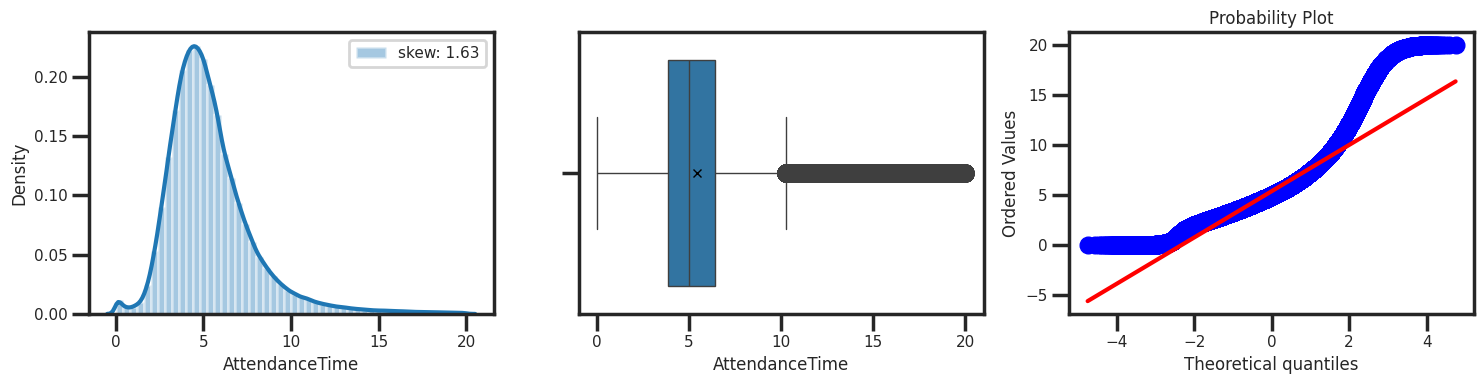

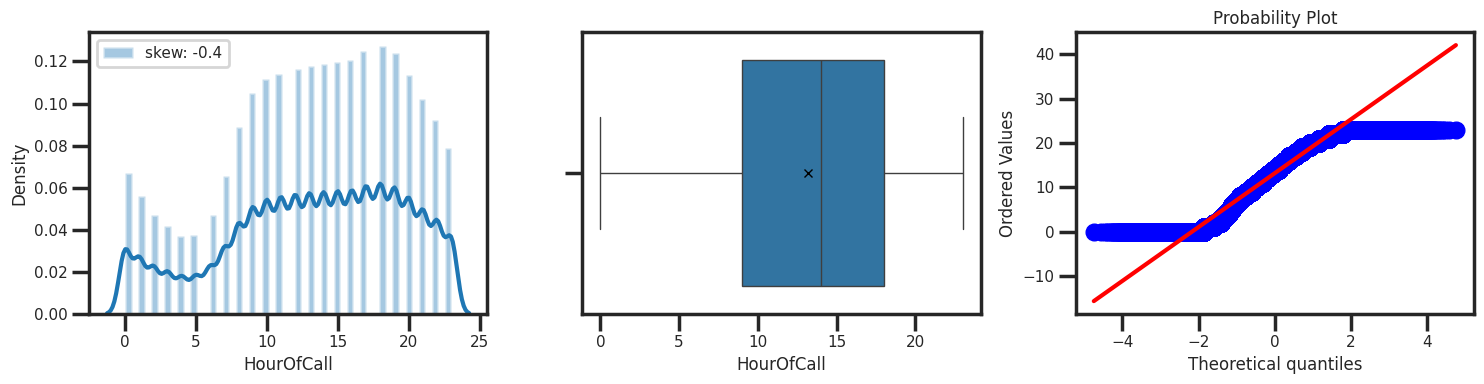

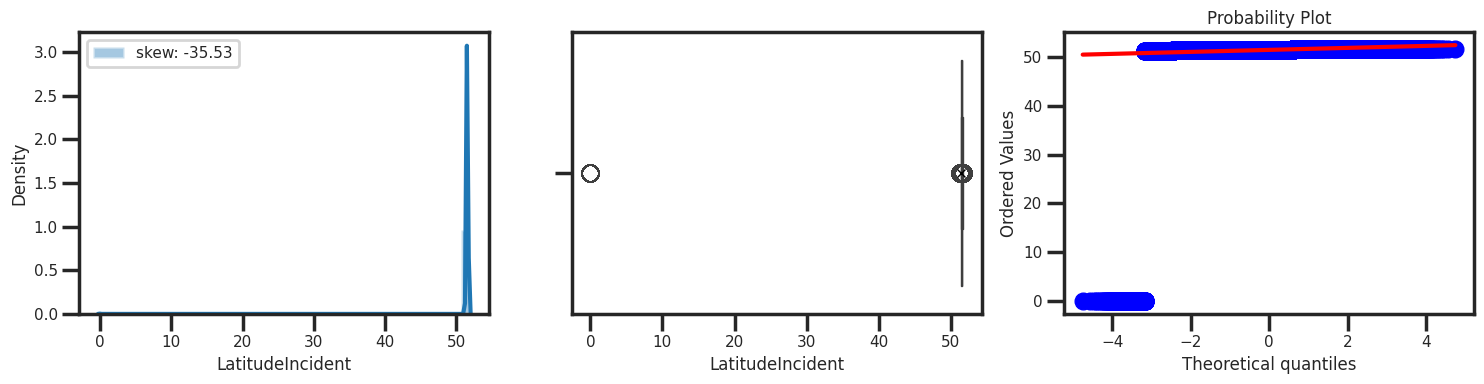

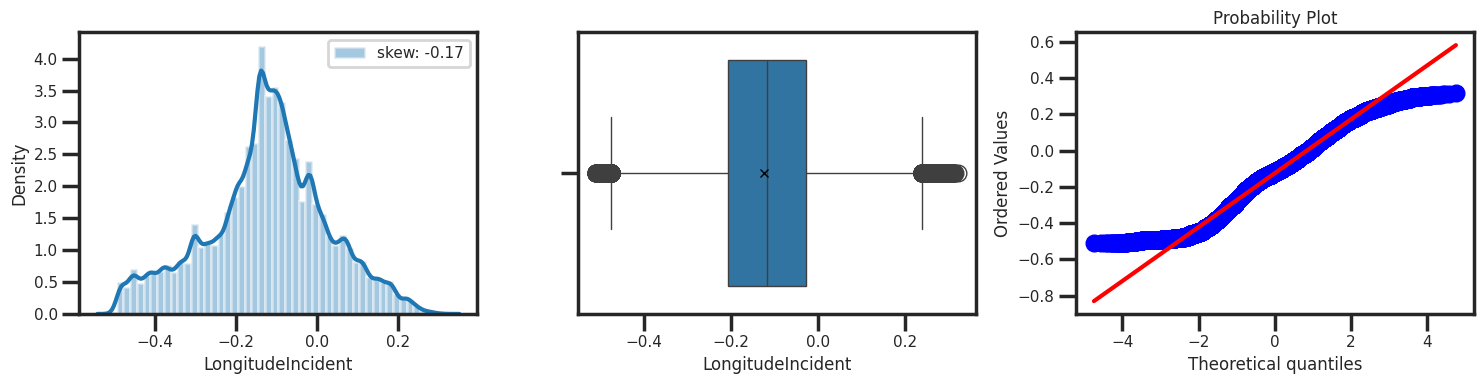

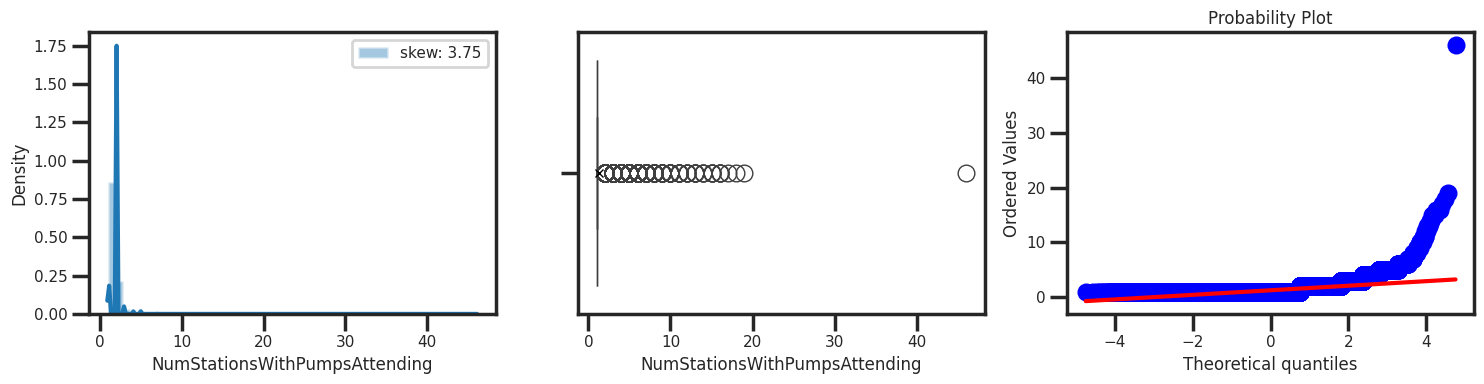

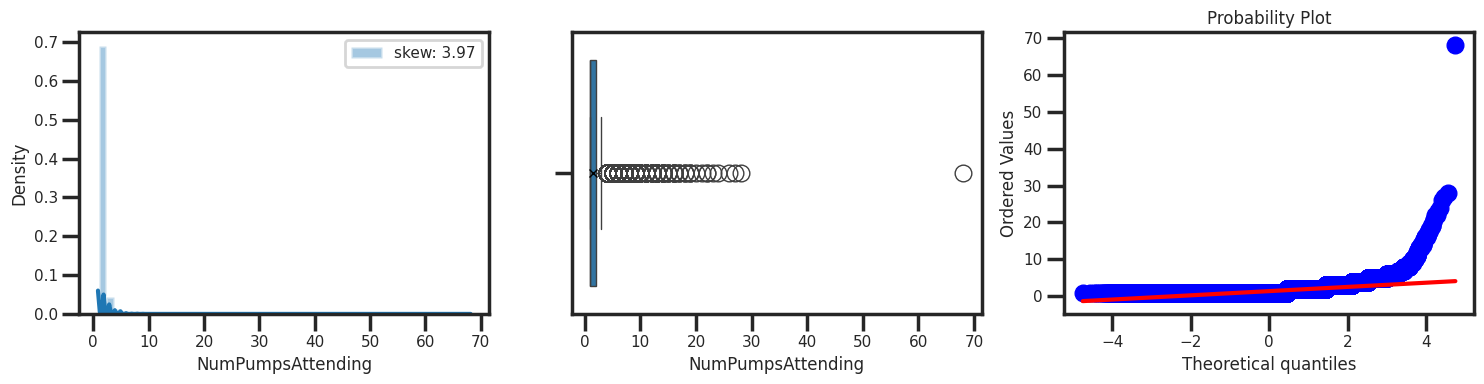

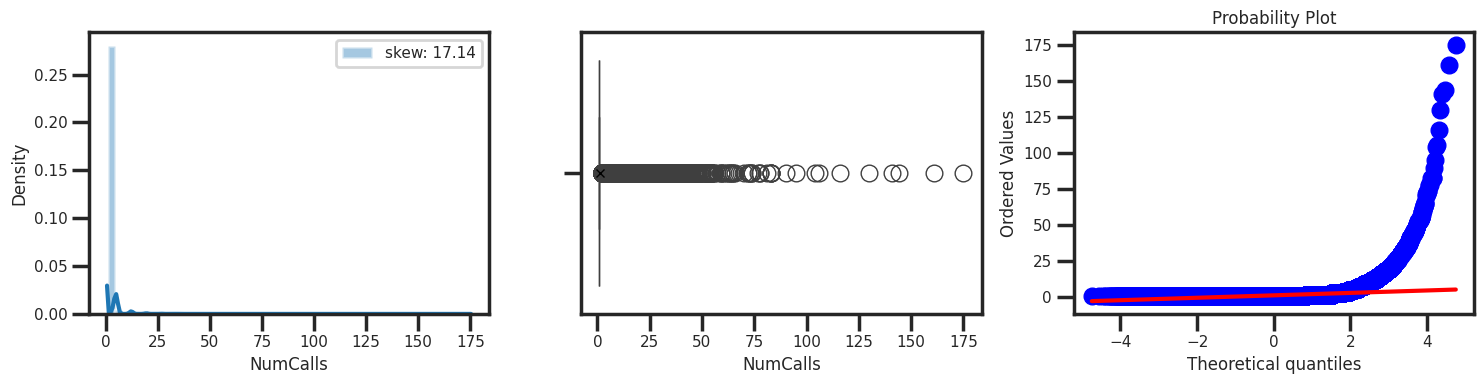

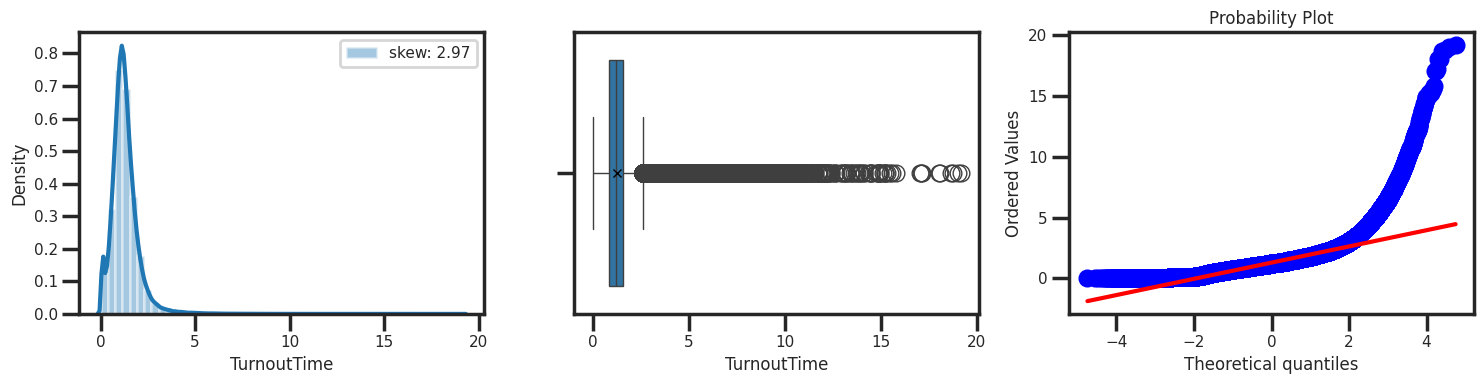

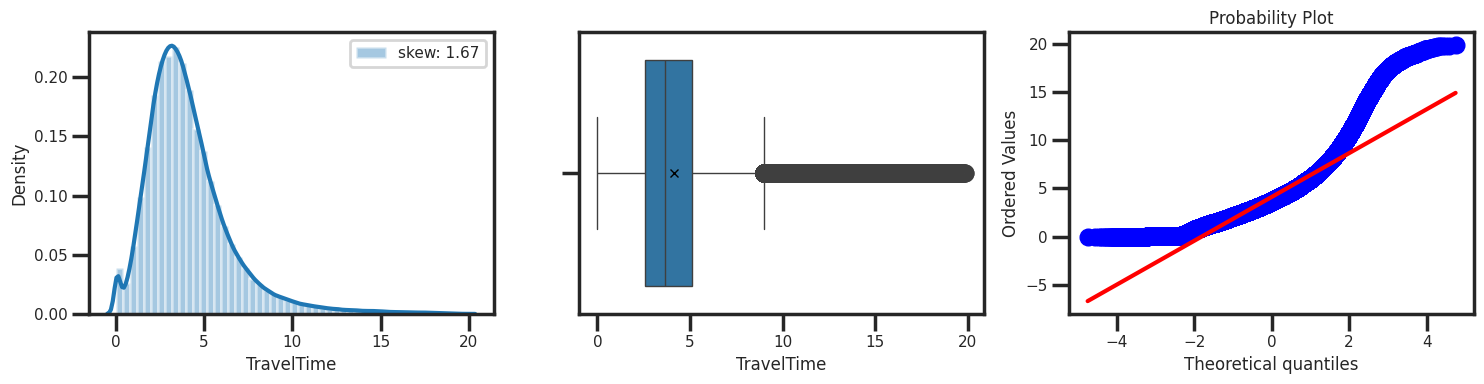

In [ ]:
# Affichage de la distribution des variables numériques
for col in int_var :

    plt.figure(figsize=(15,4))

    plt.subplot(131)
    sns.distplot(df[col],label="skew: "+str(np.round(df[col].skew(),2)))
    plt.legend()

    plt.subplot(132)
    meanprops={"marker":"x","markerfacecolor":"red", "markeredgecolor":"black"}
    sns.boxplot(x=df[col],showmeans=True,meanprops=meanprops)

    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()

<b> NOTES :</b> <br>
   - En analysant les variables numériques, on observe qu'elles présentent beaucoup de valeurs abérantes et aucune variable ne suit une distribution de la loi normale.

#### 5B. Distributions des variables catégorielless

In [ ]:
cat_var = split_int_cat(df)[1]
cat_var.head()

,DateOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,DeployedFromStationName,DeployedFromLocation,SecondPumpArrivingDeployedFromStation,ResourceCode,DelayCodeDescription
2,2009-01-01,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Road surface/pavement,Street,Enfield,Haselbury,Edmonton,Home Station,No Second pump deloyed,A341,No Delay
3,2009-01-01,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Domestic garden (vegetation not equi...,On land associated with building,Hillingdon,Hillingdon East,Hillingdon,Home Station,No Second pump deloyed,G232,No Delay
4,2009-01-01,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Cycle path/public footpath/bridleway,Street,Islington,Laycock,Holloway,Home Station,Holloway,A311,No Delay
8,2009-01-01,Special Service,Special Service - Road Traffic Collision,Vehicle,Vehicle - Car,Motorway / elevated road,Greenwich,Kidbrooke Village & Sutcliffe,East Greenwich,Home Station,No Second pump deloyed,E231,No Delay
9,2009-01-01,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Refuse/rubbish tip,On land associated with building,Hounslow,Hounslow South,Heston,Home Station,Heston,G381,No Delay


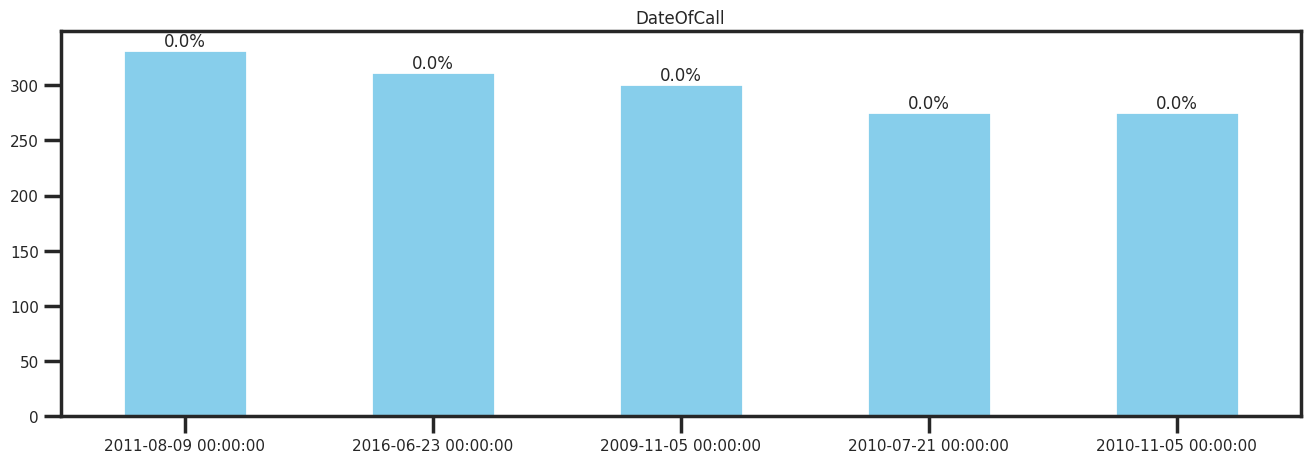

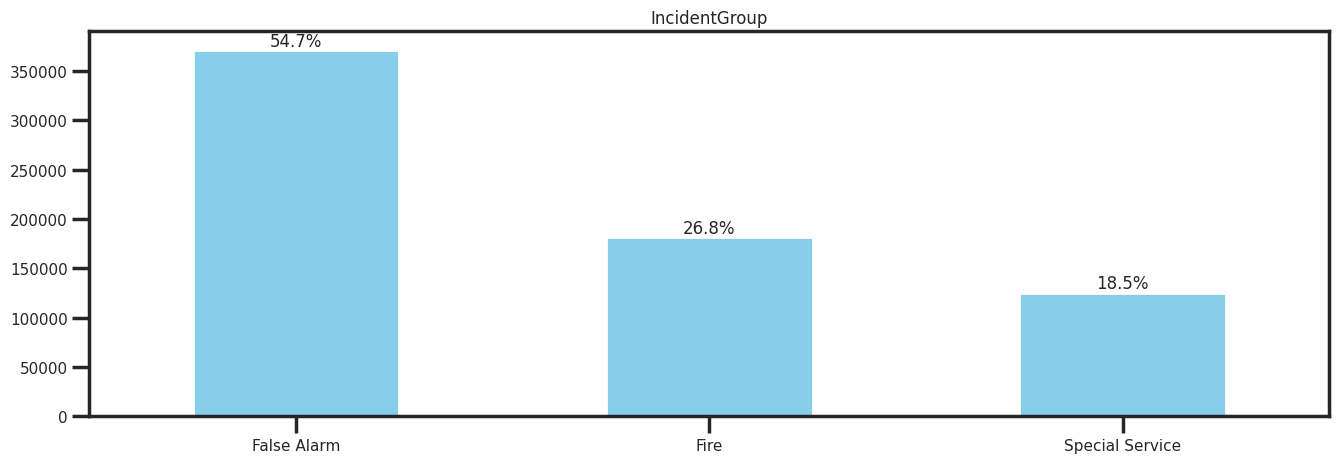

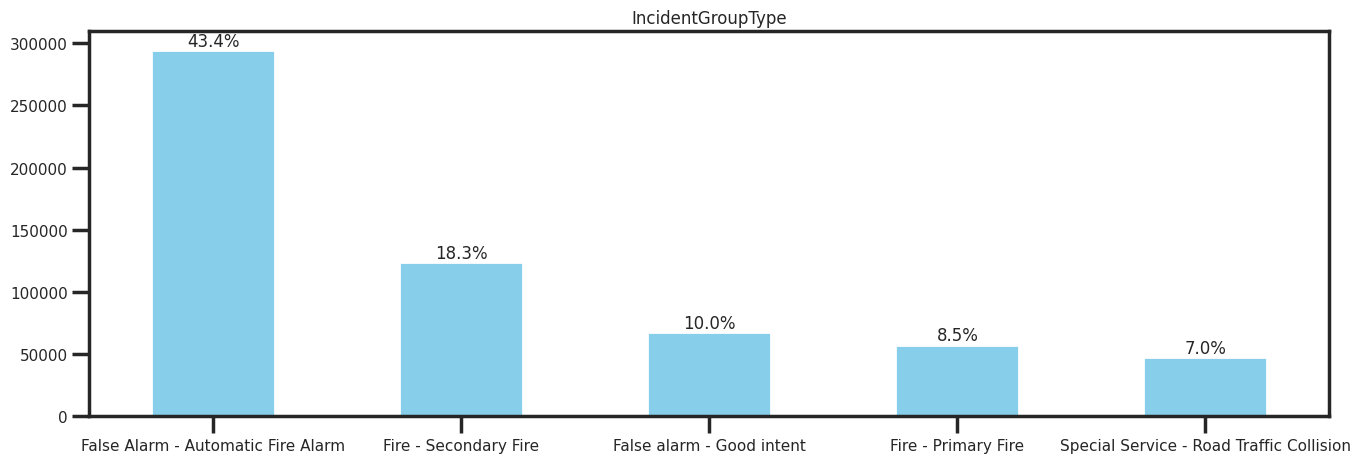

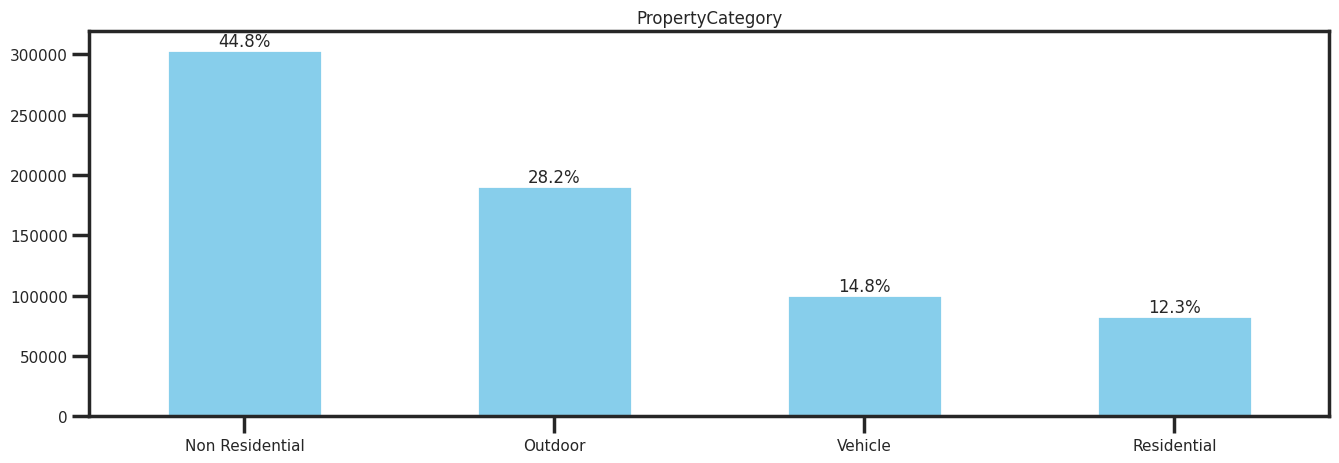

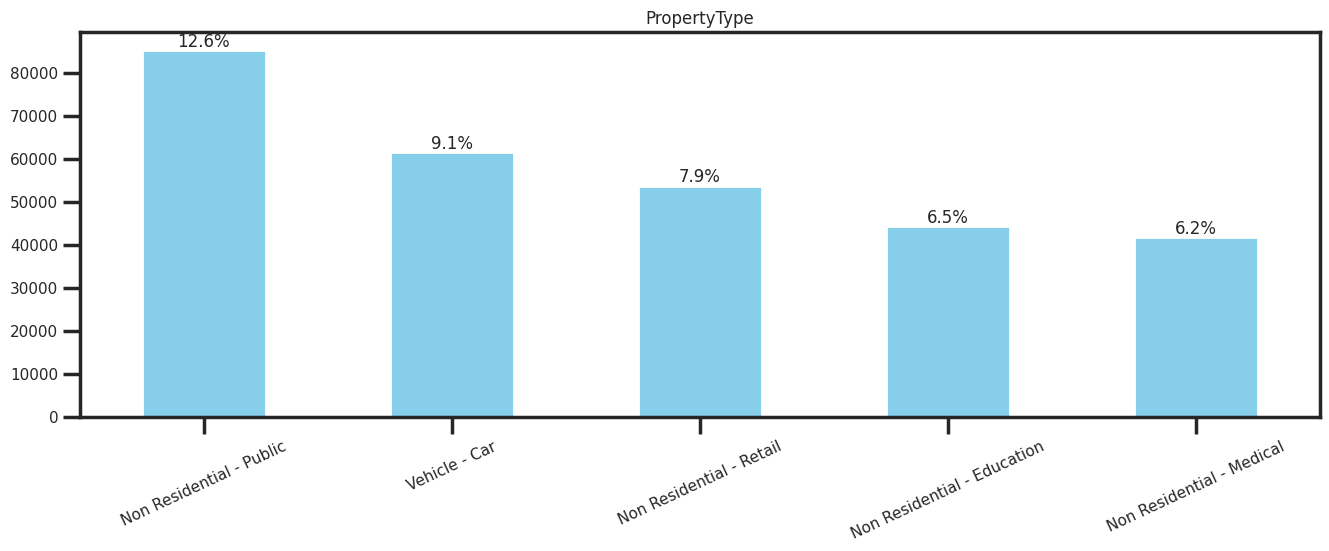

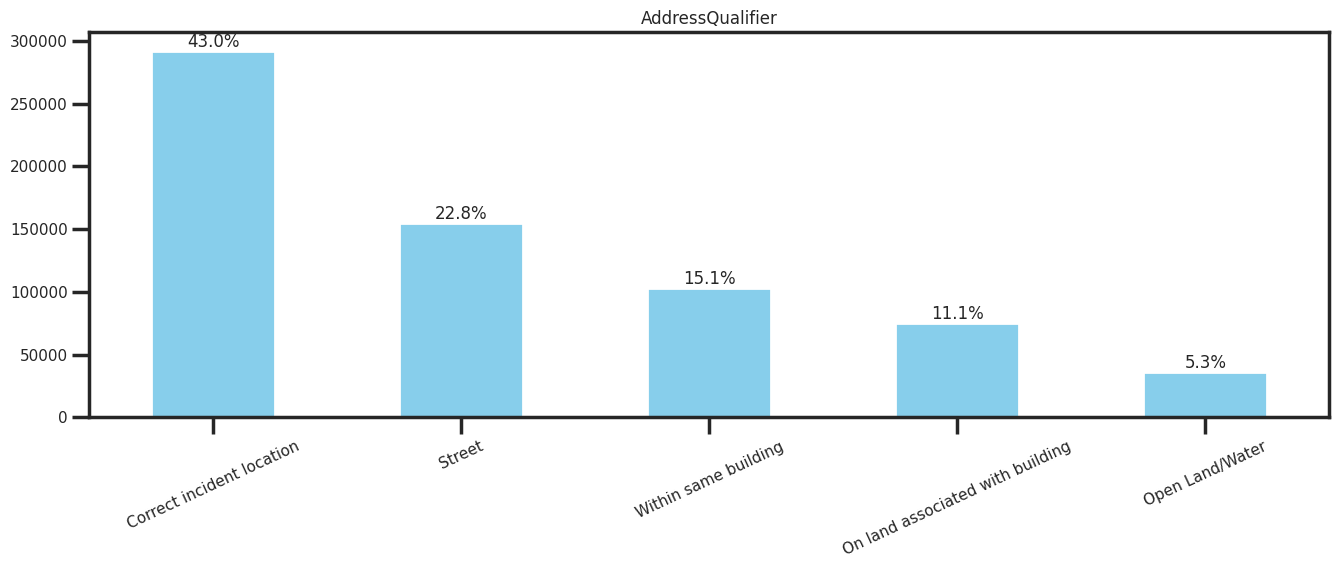

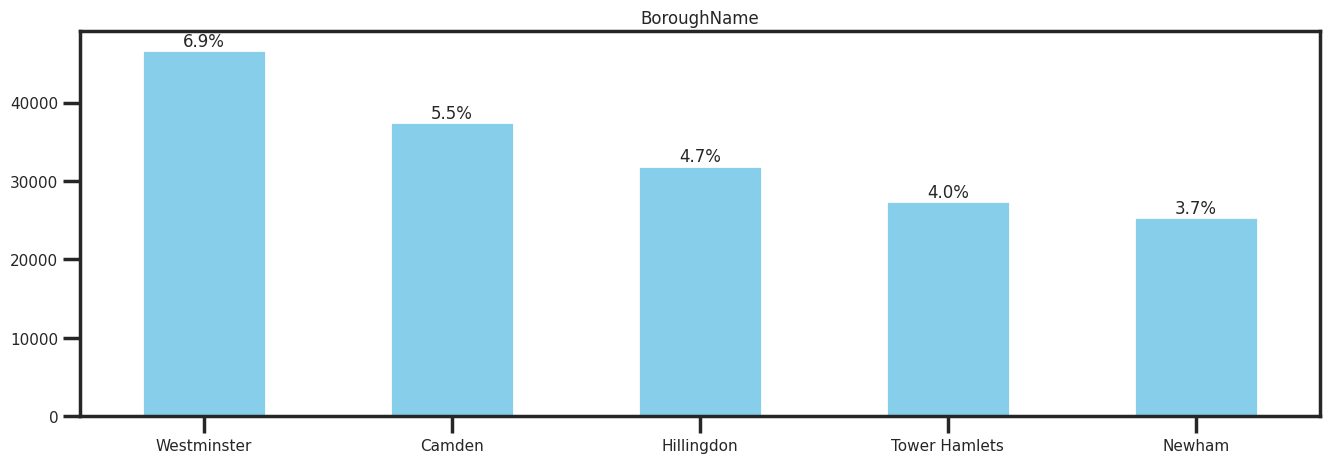

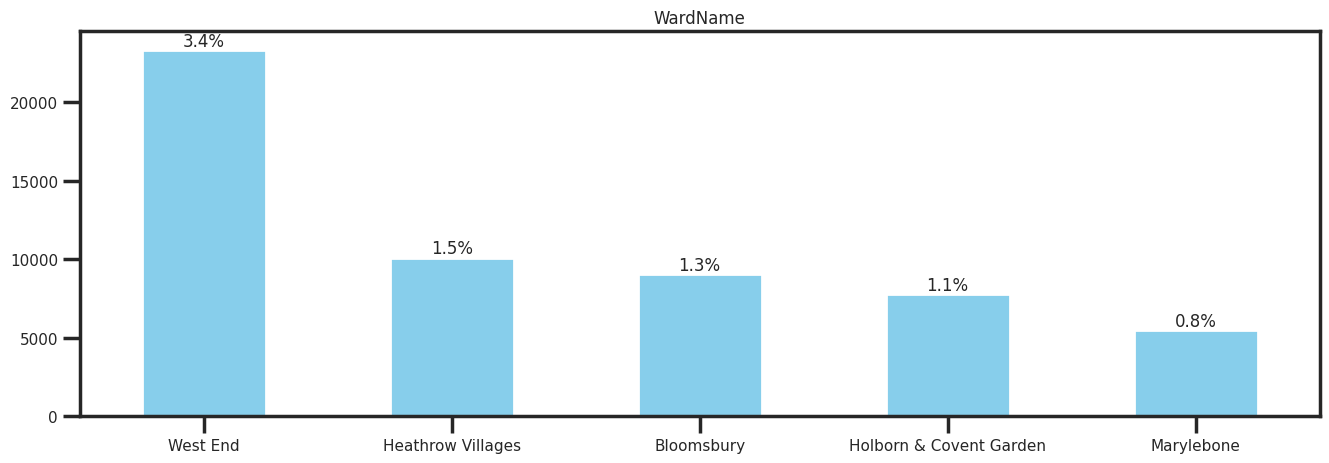

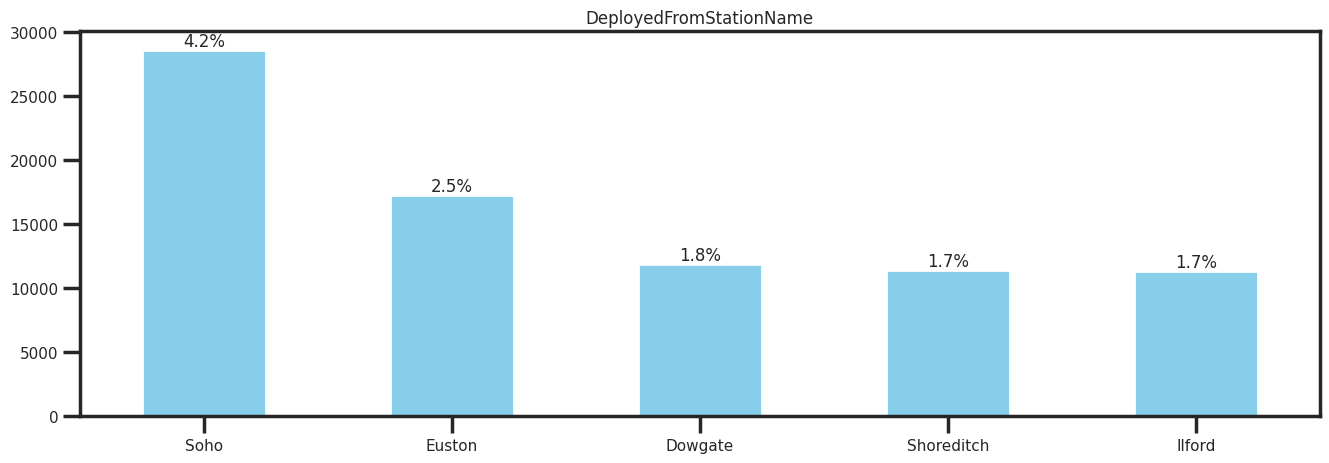

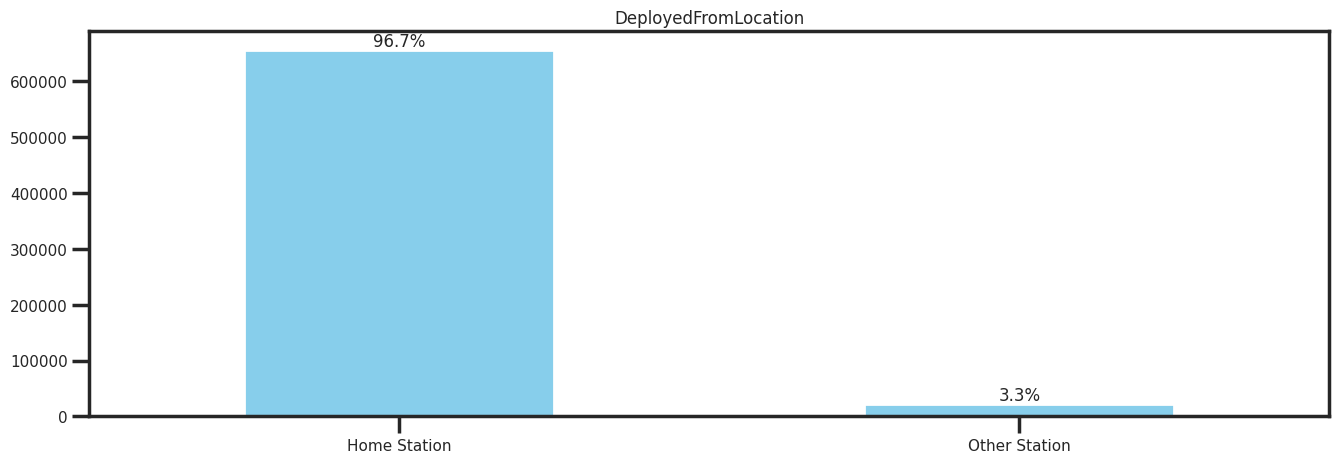

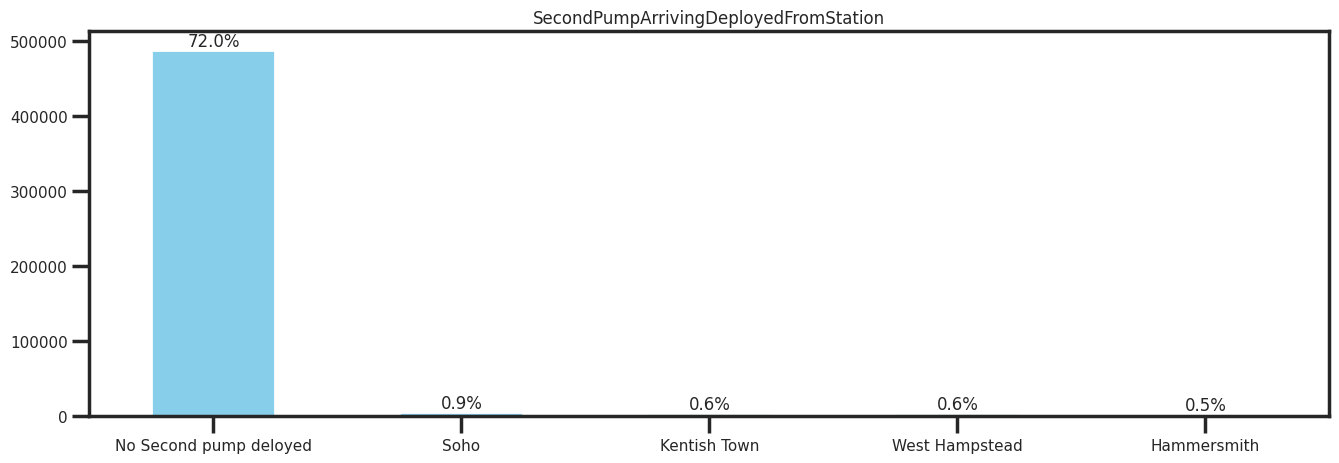

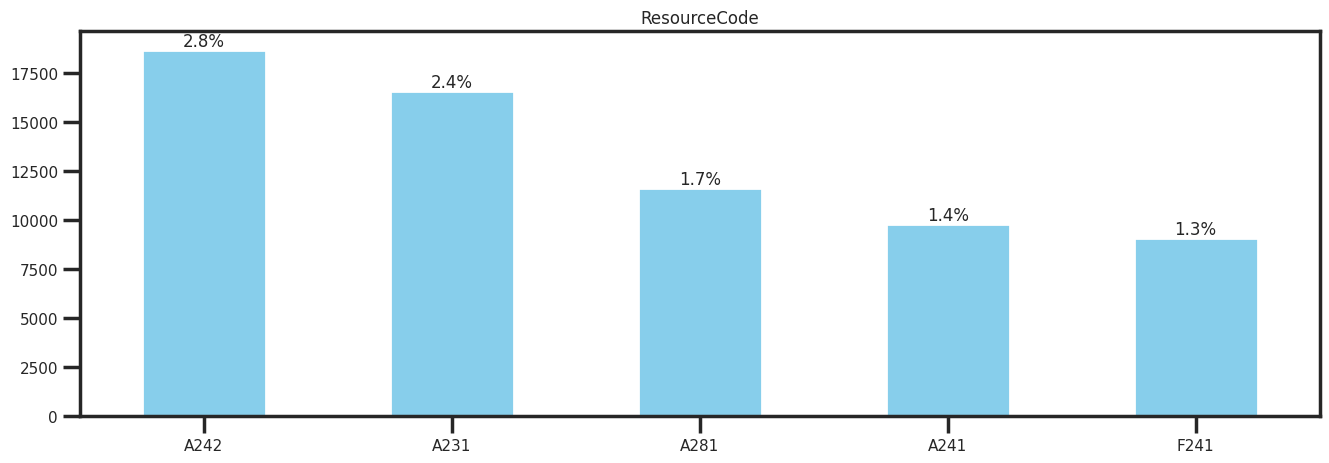

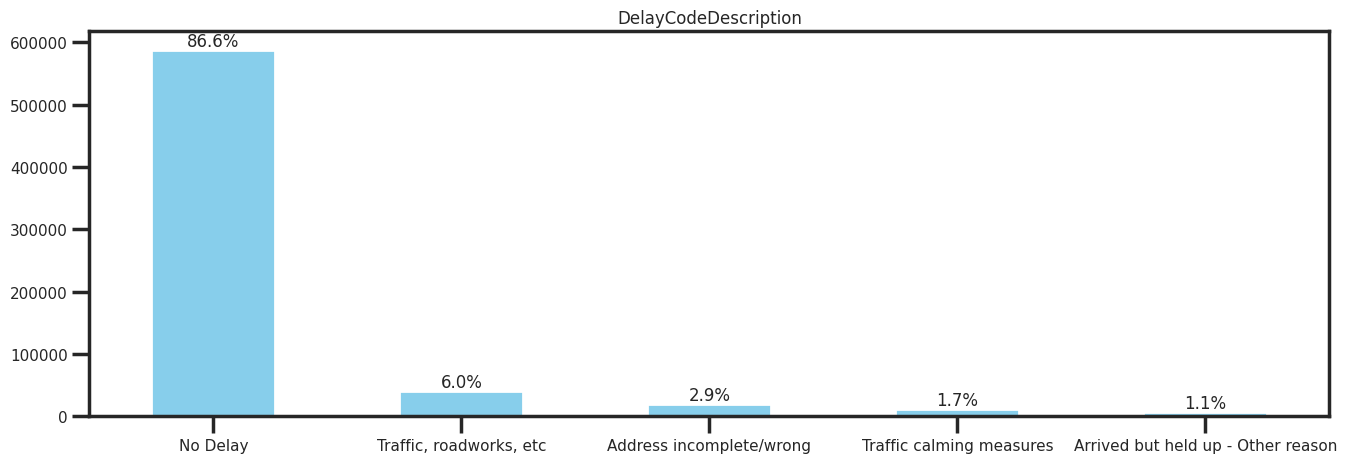

In [ ]:
# Affichage de la distribution des variables catégorielles

for col in (cat_var) :

    fig,ax= plt.subplots(figsize=(16,5))

    #Affichge du top 10 pour les variables catégoriques
    ax = df[col].value_counts()[:5].plot(kind="bar",color=["skyblue"])
    ax.set_title(col)

    if col =="PropertyType" or col =="AddressQualifier":
        plt.xticks(rotation=25)

    else:
        plt.xticks(rotation=0)

    #Affichage des étiquettes de valeurs
    for c in ax.containers:
        labels = [f'{h/df[col].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c,labels=labels, label_type='edge')

<b> NOTES :</b> <br>
Nous avons ici l'analyse chiffrée de la distribution de nos variables. Quelques chiffres:

- Plus de la moitié (54,7%) des incidents sont des fausses alarmes.
- Près de la moitié (44,8%) des incidents se produisent dans des propriétés non résidentielles.
- Dans la plupart des cas (72%), un seul camion de pompiers a suffi.
- La grande majorité (86,6%) des incidents n’ont pas connu de retard..
   



Répartition des Causes de Retards dans les Données

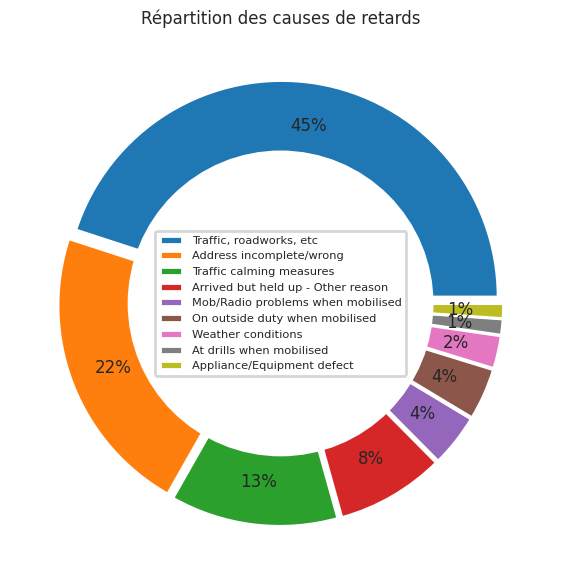

In [ ]:
# Calcul de la fréquence des retards par catégorie
x = df.DelayCodeDescription.value_counts(normalize=True).drop(["No Delay"]).index
y = df.DelayCodeDescription.value_counts(normalize=True).drop(["No Delay"]).values

# Trraçage camenbert
fig, ax = plt.subplots(figsize=(12, 6))
explode = (0.03, 0.03, 0.03, 0.03, 0.03,0.03, 0.03, 0.03,0.03 )
ax.pie(y, labels = None,autopct='%.0f%%',pctdistance=0.8,explode=explode)
ax.set_xlabel('')
ax.set_title('Répartition des causes de retards')

# Ajout d'un cercle blanc au centre du graphique
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajout d'une légende
plt.legend(x, loc="center",fontsize=8.2)
plt.tight_layout()

<b> NOTES :</b> <br>

Ce piechart nous permet de visualiser la répartition des causes de retards dans les données. Les catégories "No Delay" et "Not held up" sont exclues pour se concentrer sur les retards spécifiques.
  - 45 % des causes de retards sont liées aux traffic routier, au travaux...
  - 22% sont liées aux adresses fausses ou incomplètes;
  - 13 % à des mesures de modération de la circulation;
  - 20 % à des empêchements autres


# 5'. Suppression des outliers de la variable cible

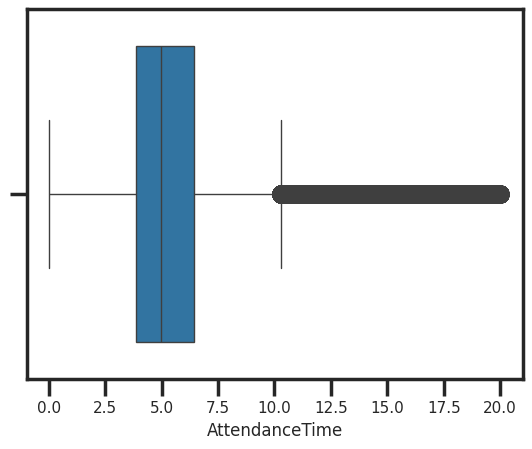

In [ ]:
# Affichage de la boite à moustaches de la variable AttendanceTime avant traitement des outliers
sns.boxplot(data=df,x="AttendanceTime");

Identification et Traitement des Valeurs Atypiques dans le Temps d'Intervention

In [ ]:
# Calcul Q1 et Q3
Q1 = df["AttendanceTime"].quantile(0.25)
Q3 = df["AttendanceTime"].quantile(0.75)

# Calcul IQR (Inter Quartile Range)
IQR = Q3 - Q1

# Définition des limites pour les outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Filtrage des valeurs qui sont dans l'intervalle [borne_inf, borne_sup]
df = df[(df["AttendanceTime"] >= borne_inf) & (df["AttendanceTime"] <= borne_sup)]

<b> NOTES :</b> <br>
Le concept de l'IQR (Inter Quartile Range) nous aide à définir des limites au-delà desquelles une valeur est considérée comme une valeur atypique. Il s'agit de de nettoyer les données en éliminant les valeurs atypiques potentielles dans la variable "AttendanceTime", contribuant ainsi à une analyse plus robuste et précise des temps de réponses.

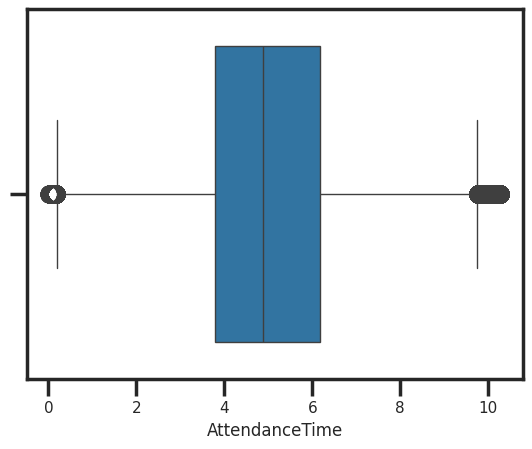

In [ ]:
# Affichage de la boite à moustaches de la variable AttendanceTime après traitement des outliers
sns.boxplot(data=df,x="AttendanceTime");

In [ ]:
print("Min : ",df.AttendanceTime.min())
print("Median", df.AttendanceTime.median())
print("Max: ",df.AttendanceTime.max())

Min :  0.02
Median 4.87
Max:  10.27


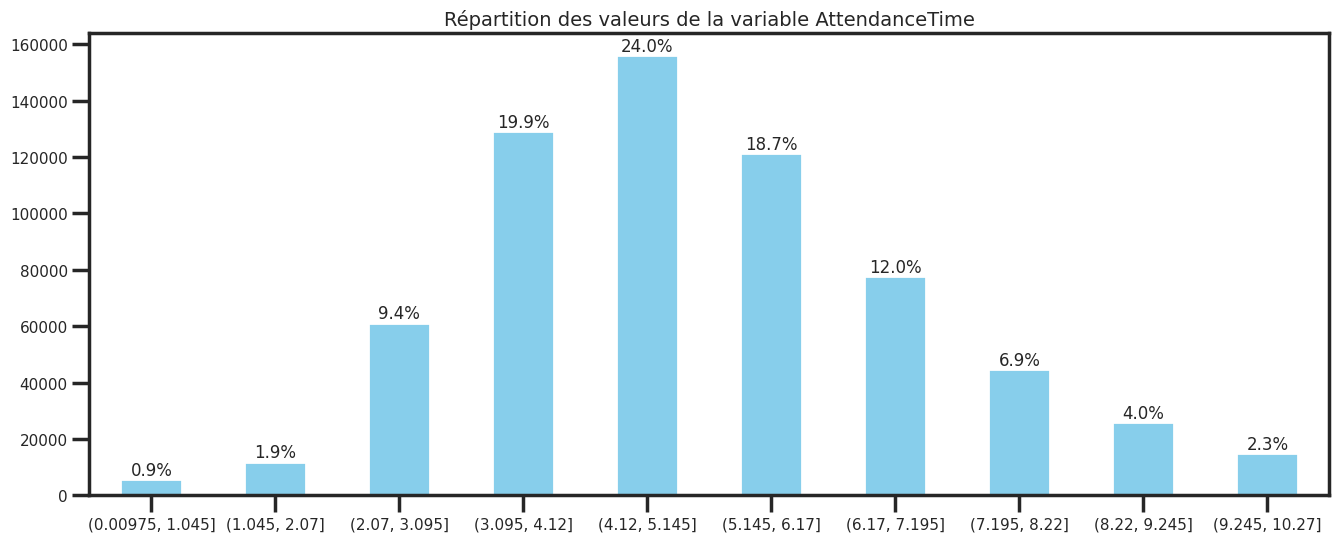

In [ ]:
# Création des intervalles
bins = pd.cut(df["AttendanceTime"], 10)

# Traçage du graphique
fig, ax = plt.subplots(figsize=(16,6))
ax = bins.value_counts(sort=False).plot(kind='bar', color='skyblue')

# Ajout des étiquettes de données
for c in ax.containers:
    labels = [f'{h/df["AttendanceTime"].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

# Rotation des étiquettes
plt.xticks(rotation=0)

# Ajout d'un titre au graphique
plt.title("Répartition des valeurs de la variable AttendanceTime", fontsize=14);

<b> NOTES :</b> <br>
   - 24% des données entre 4.112 et 5.145 min.
   - 43,9 % des temps de réponse sont supérieurs aux objectifs de la LFB ( avoir un temps de réponse - de 6 minutes)

# 6. Analyse de l'intéraction entre les variables

In [ ]:
df.head(1)

,AttendanceTime,DateOfCall,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,NumPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,TurnoutTime,TravelTime,DelayCodeDescription
2,5.13,2009-01-01,0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Road surface/pavement,Street,Enfield,Haselbury,51.633342,-0.068488,Edmonton,Home Station,1.0,1.0,No Second pump deloyed,2.0,A341,2.52,2.62,No Delay


#### 6A. Nombre d'appel par HourOfCall selon IncidentGroup

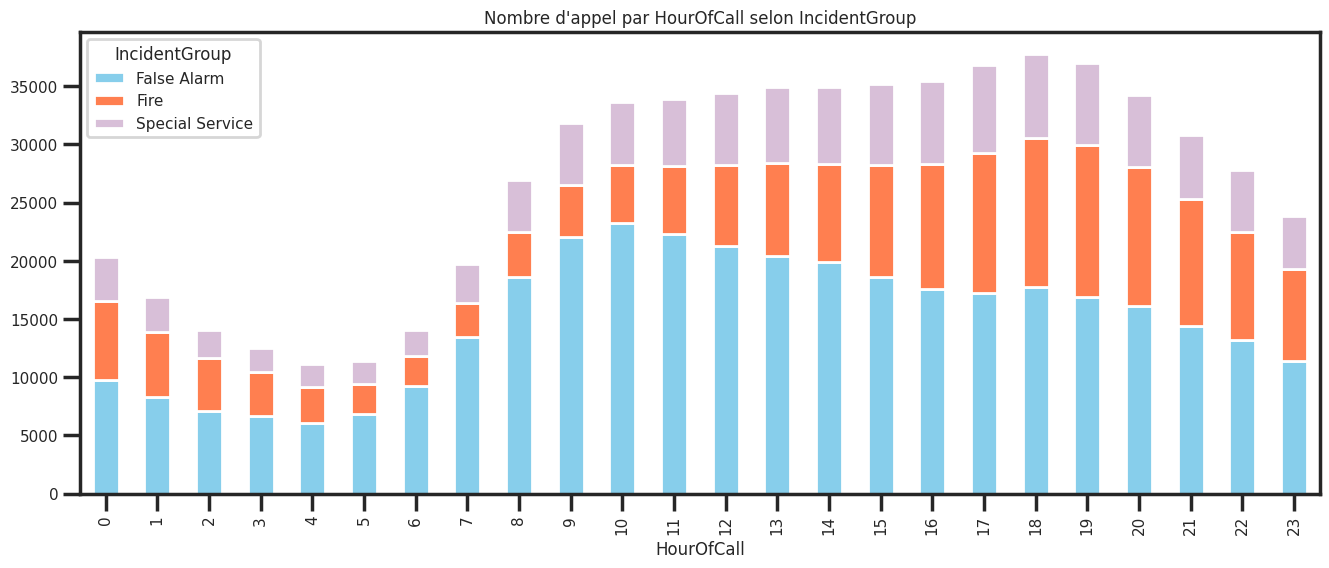

In [ ]:
df_stacked = df.groupby(["HourOfCall", "IncidentGroup"]).size().reset_index().pivot(columns="IncidentGroup", index="HourOfCall", values=0)
ax = df_stacked.plot(kind="bar", stacked=True,figsize=(16,6),title="Nombre d'appel par HourOfCall selon IncidentGroup",color=["Skyblue","coral","thistle"]);

<b> NOTES :</b> <br>
- Le volume d’appels est plus faible tard le soir, ce qui semble normal car c’est l’heure où les personnes dorment.
- Il y a un fort volume d’appels entre 17h et 19h.
- Le nombre d’appels pour le motif “Feu” augmente au fil de la journée.
- La plupart des appels concernent des fausses alarmes.

#### 6B. Nombre d'appel par PropertyCategory selon IncidentGroup

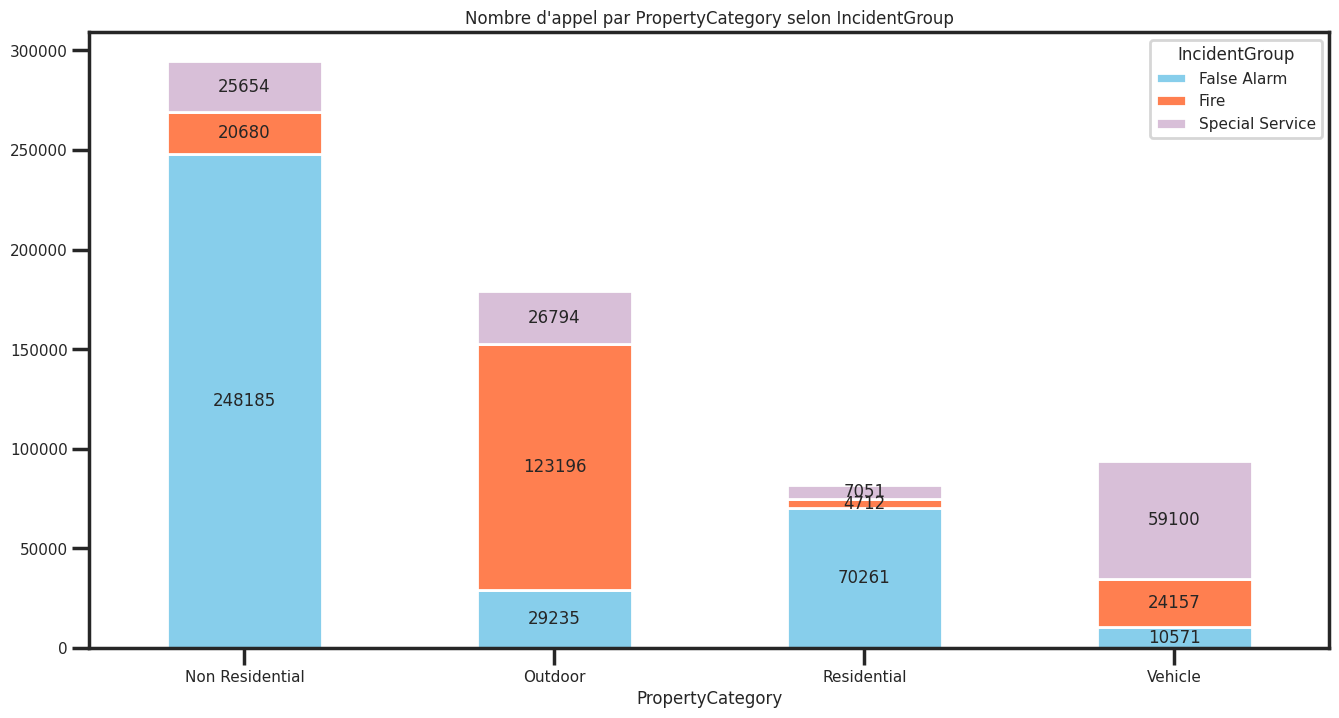

In [ ]:
df_stacked2 = df.groupby(["IncidentGroup", "PropertyCategory"]).size().reset_index().pivot(columns="IncidentGroup", index="PropertyCategory", values=0)
ax = df_stacked2.plot(kind="bar", stacked=True, figsize=(16,8),title="Nombre d'appel par PropertyCategory selon IncidentGroup",color=["Skyblue","coral","thistle"])
ax.set_xticklabels(df_stacked2.index, rotation=0, ha="center")
ax.bar_label(ax.containers[0], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')
ax.bar_label(ax.containers[2], label_type='center');

<b> NOTES :</b> <br>
- La plupart des incidents dans les espaces résidentiels et non résidentiels sont des fausses alarmes.
- La plupart des incidents à l’extérieur sont des incendies.
- Les pompiers interviennent majoritairement pour des services spéciaux sur les voitures.

#### 6C. DelayCodeDescription par AddressQualifier

In [ ]:
df_NoDelay = df[df["DelayCodeDescription"] != "No Delay"]
df_DelayCount = df_NoDelay.groupby(["AddressQualifier", "DelayCodeDescription"]).size().reset_index(name="Count")
df_DelayCount.sort_values(by="Count", ascending=False, inplace=True)
df_DelayCount.drop_duplicates(subset="AddressQualifier", keep="first", inplace=True)
df_DelayCount.sort_values(by="DelayCodeDescription", ascending=True, inplace=True)
df_DelayCount

,AddressQualifier,DelayCodeDescription,Count
36,Open Land/Water,Address incomplete/wrong,2543
18,Nearby Address,Address incomplete/wrong,626
7,Correct incident location,"Traffic, roadworks, etc",15847
61,Street,"Traffic, roadworks, etc",7859
70,Within same building,"Traffic, roadworks, etc",6008
34,On land associated with building,"Traffic, roadworks, etc",3411
16,Motorway / elevated road,"Traffic, roadworks, etc",416
52,Railway / rolling stock,"Traffic, roadworks, etc",62


<b> NOTES :</b> <br>
- Ces résultats ne sont pas surprenants : les pompiers sont souvent en retard à cause d'adresses incorrectes ou mauvaises lors d'interventions sur des terrains ouverts ou des adresses approximatives.

# 7. Analyse de l'intéraction entre les variables et la variable cible

#### 7A. Intéraction de la variable cible avec les variables catégorielles

In [ ]:
cat_var = split_int_cat(df)[1]
cat_var.sample(2)

,DateOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,DeployedFromStationName,DeployedFromLocation,SecondPumpArrivingDeployedFromStation,ResourceCode,DelayCodeDescription
2003128,2022-06-28,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Large refuse/rubbish container (eg s...,On land associated with building,Newham,Plaistow North,Stratford,Home Station,No Second pump deloyed,F211,No Delay
1478307,2019-02-22,False Alarm,False alarm - Good intent,Non Residential,Non Residential - Transport,Within same building,Hillingdon,Heathrow Villages,Heathrow,Home Station,Hayes,G561,No Delay


##### AttendanceTime / DateOfCall

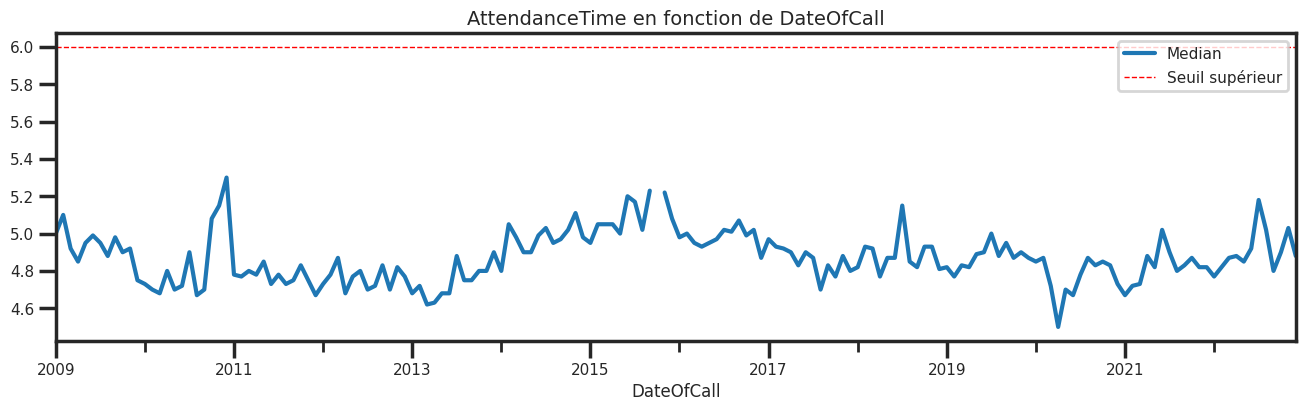

In [ ]:
fig, ax = plt.subplots(figsize=(16,4), sharex=True)
ax.set_title("AttendanceTime en fonction de DateOfCall", fontsize=14)

# On exclu 2023 car l'année n'est pas terminée
df.set_index("DateOfCall", inplace=True)
df.loc["2009":"2022"]["AttendanceTime"].resample("m").median().plot(kind="line", label="Median", linewidth=3)

# Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse
ax.axhline(y=6, color='r', linestyle='--', linewidth=1,label='Seuil supérieur')

# Ajout d'une légende
ax.legend(loc='upper right');

<b> NOTES :</b> <br>
   - Le graphique montre un pic de temps d’arrivée fin 2010 et une diminution début 2020. Cette diminution pourrait être due à la Covid-19 qui a entraîné un confinement, permettant aux pompiers de circuler plus facilement.
   - Il est également à noter une absence de données pour la fin de l’année 2015.

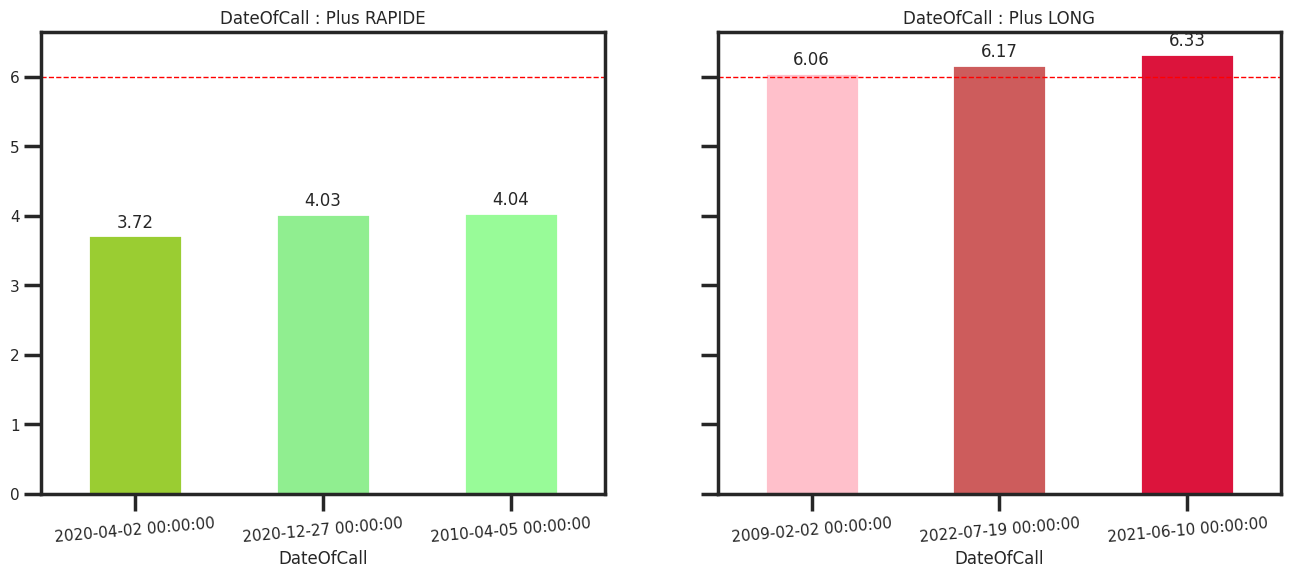

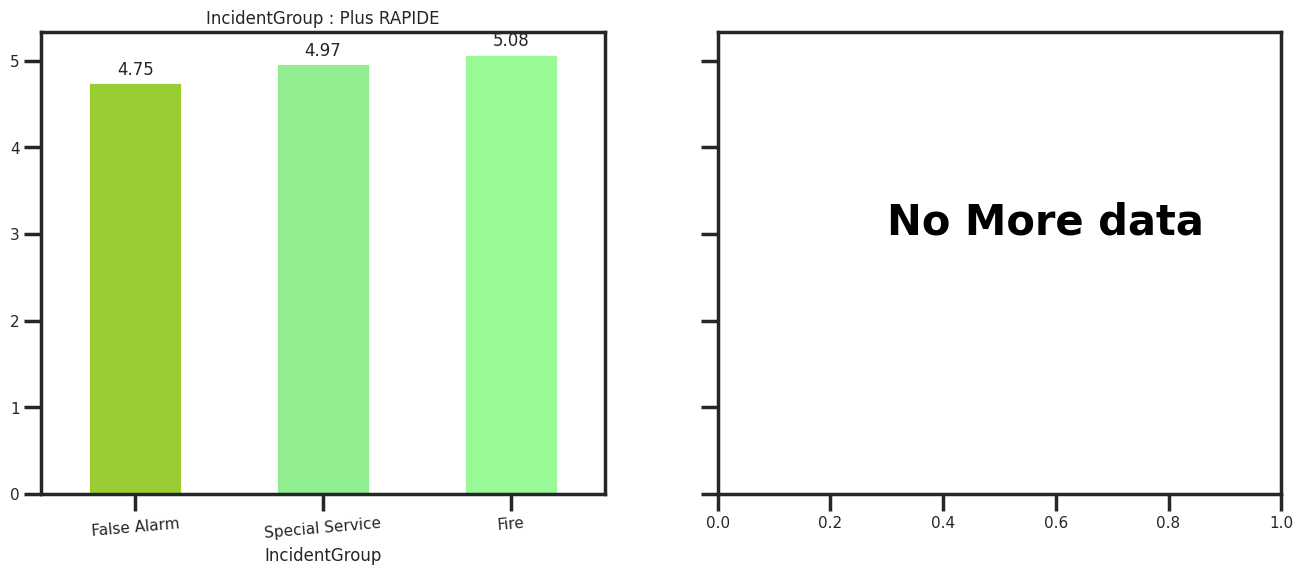

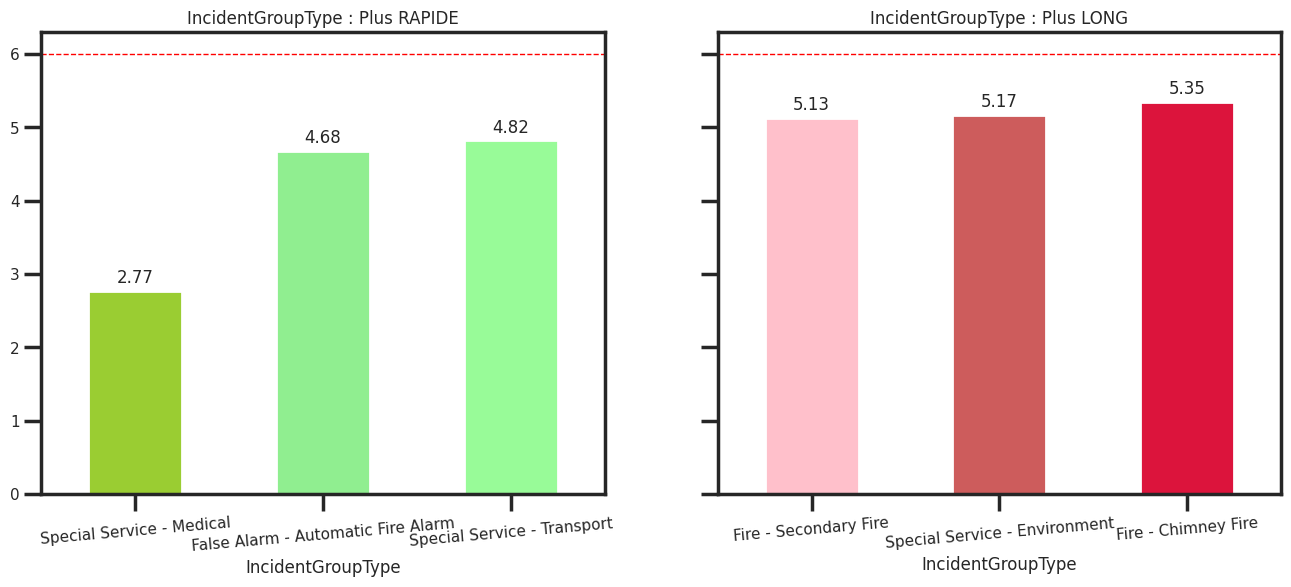

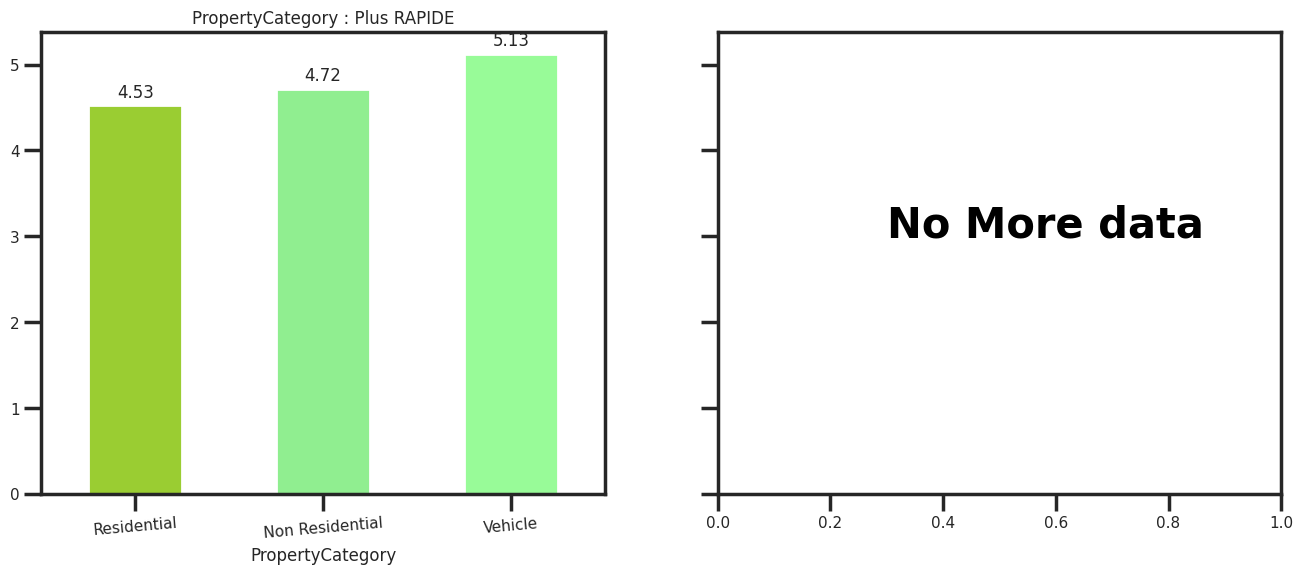

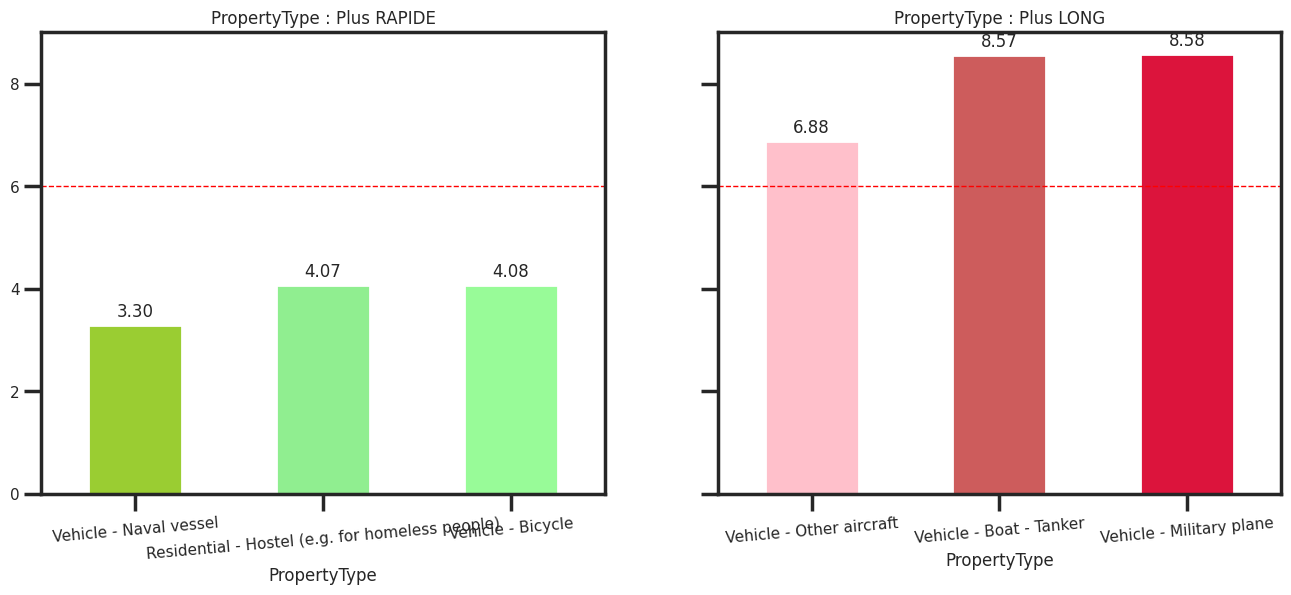

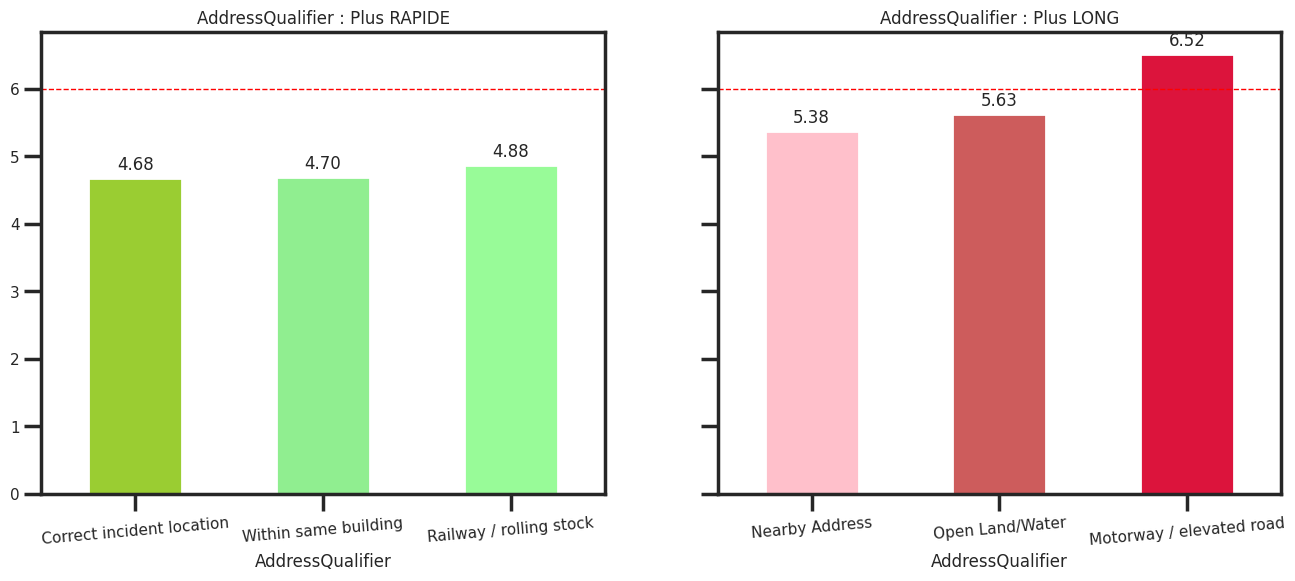

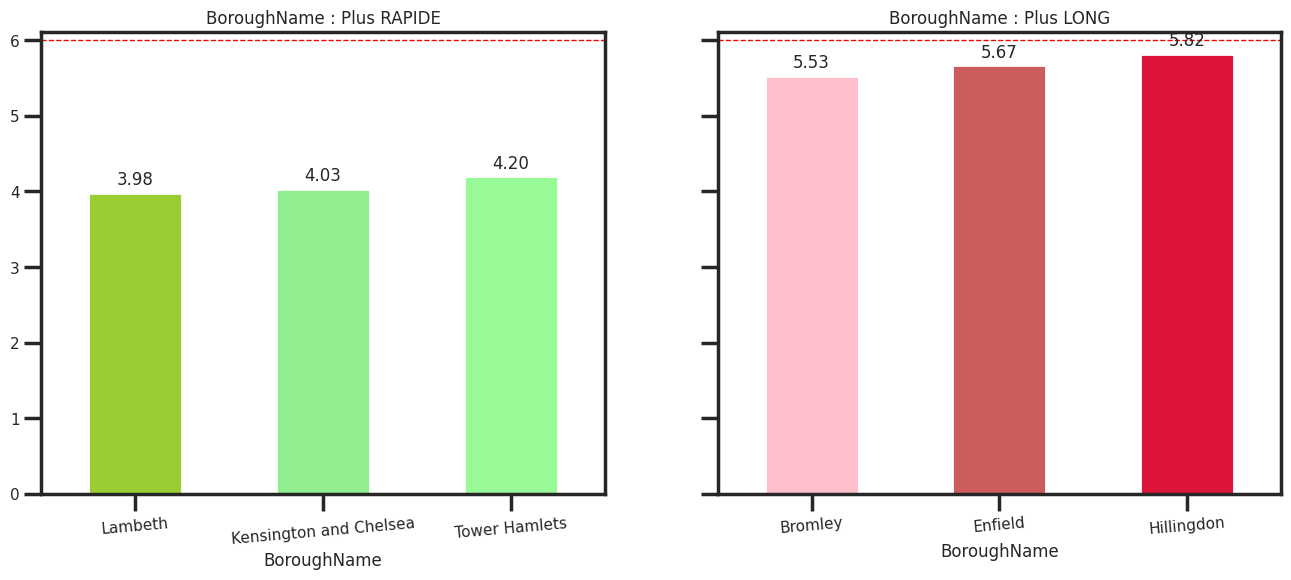

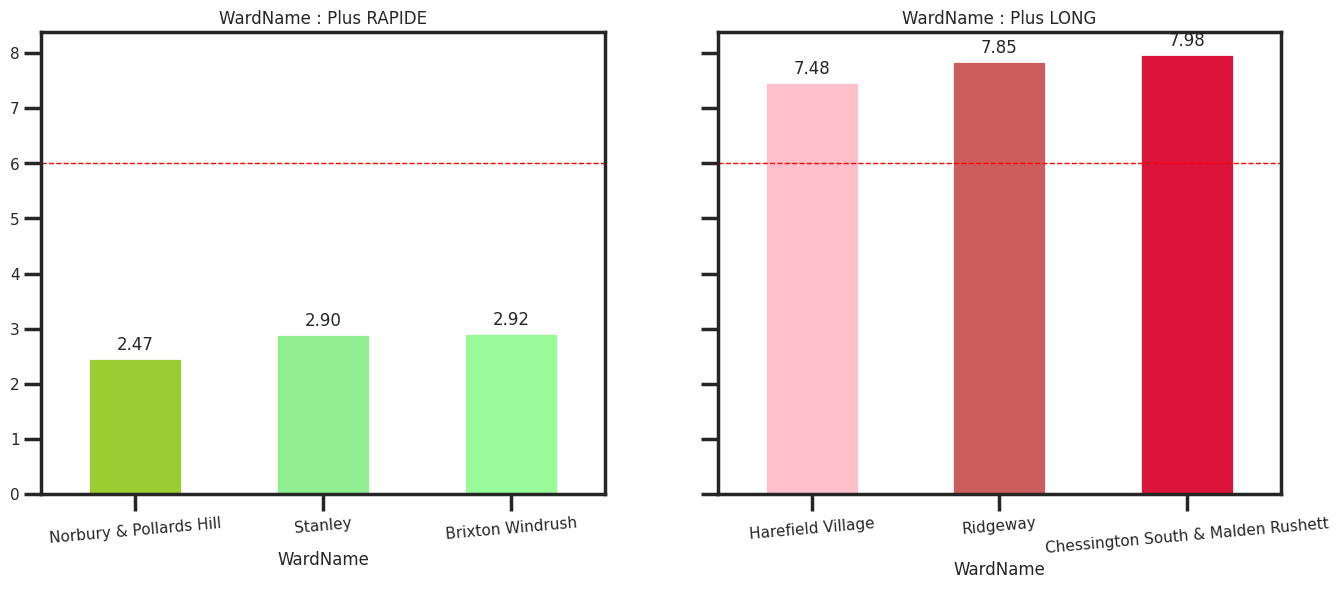

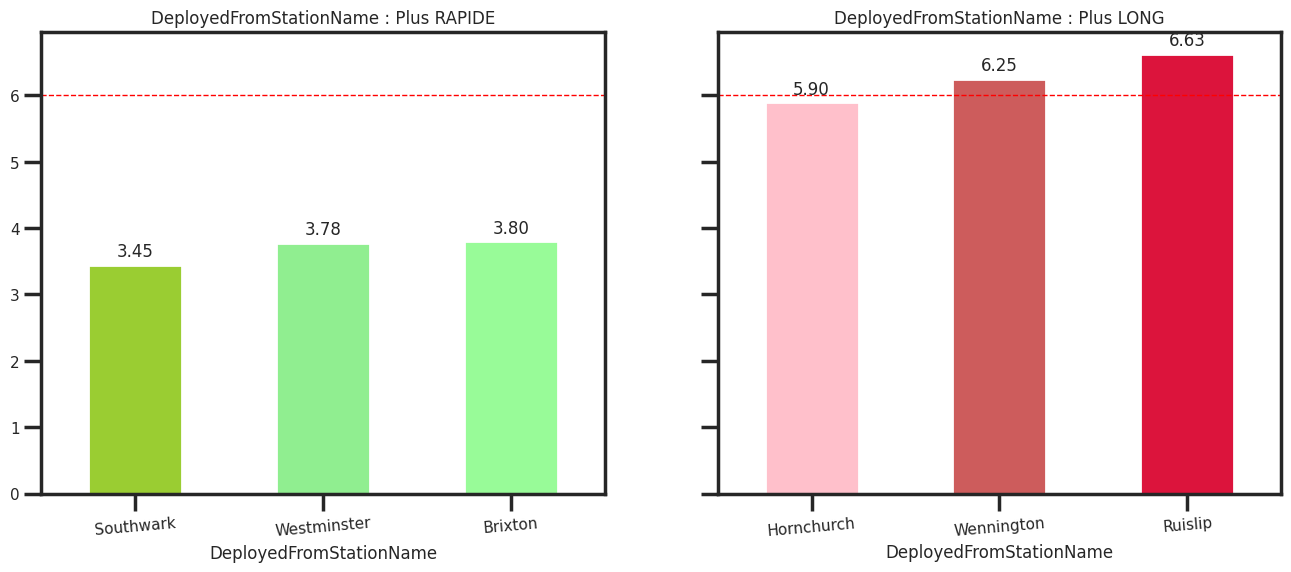

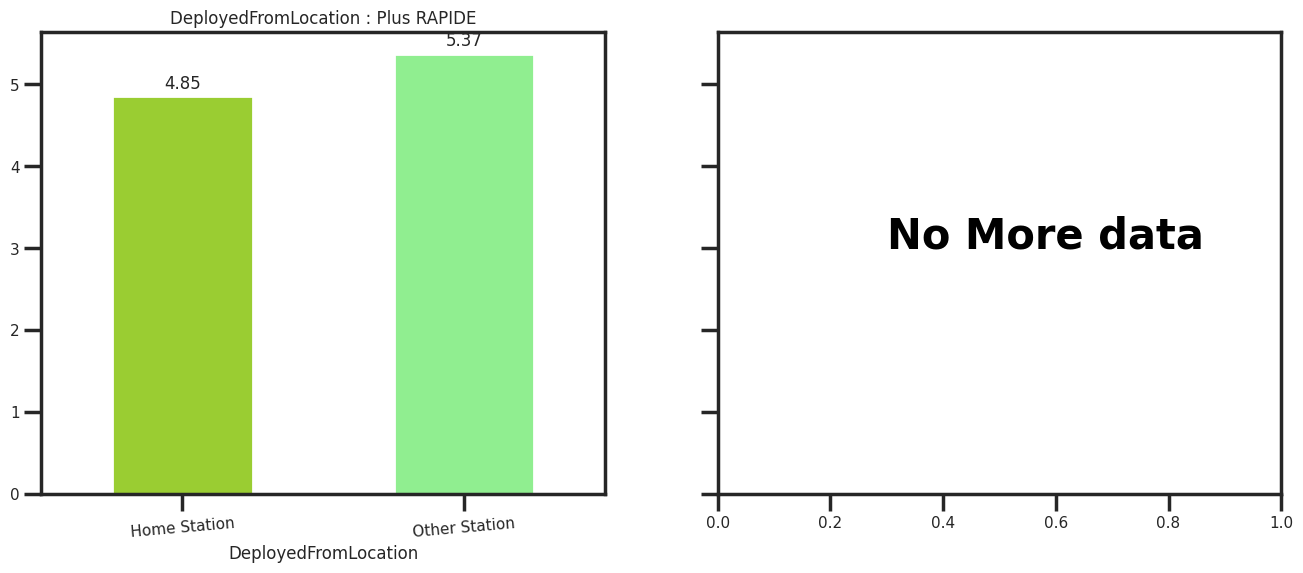

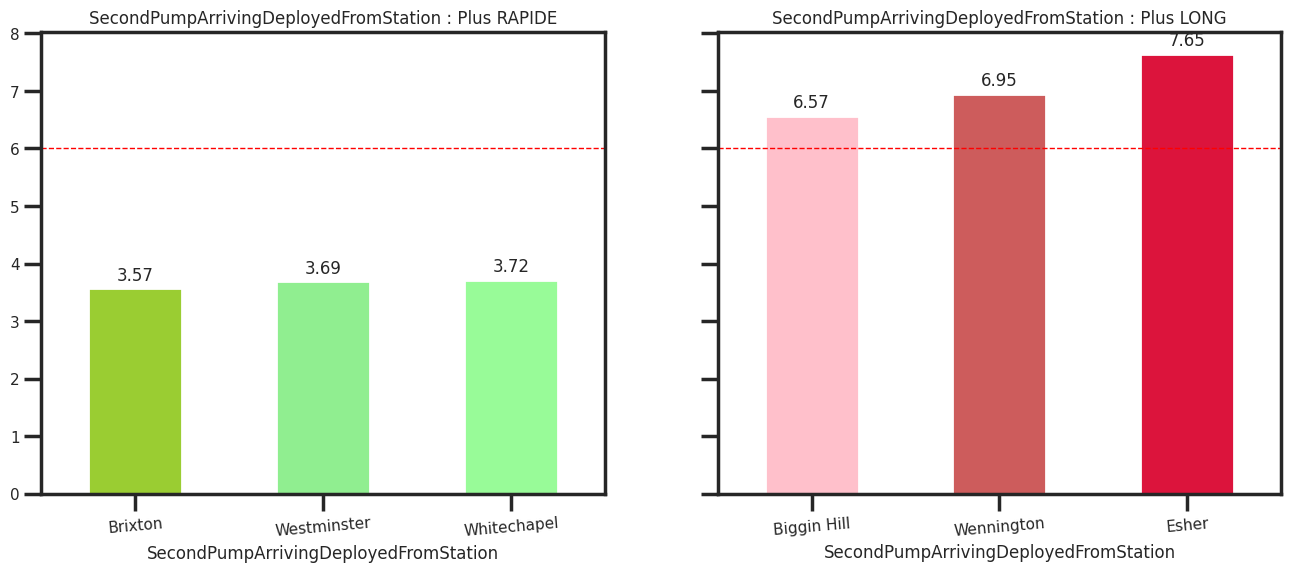

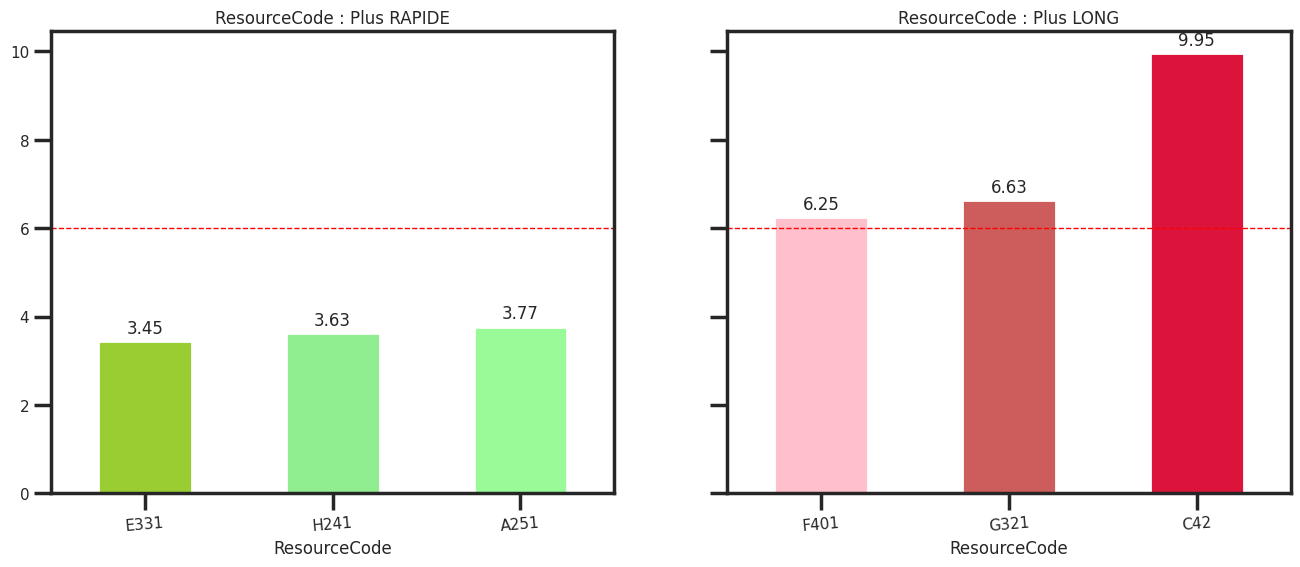

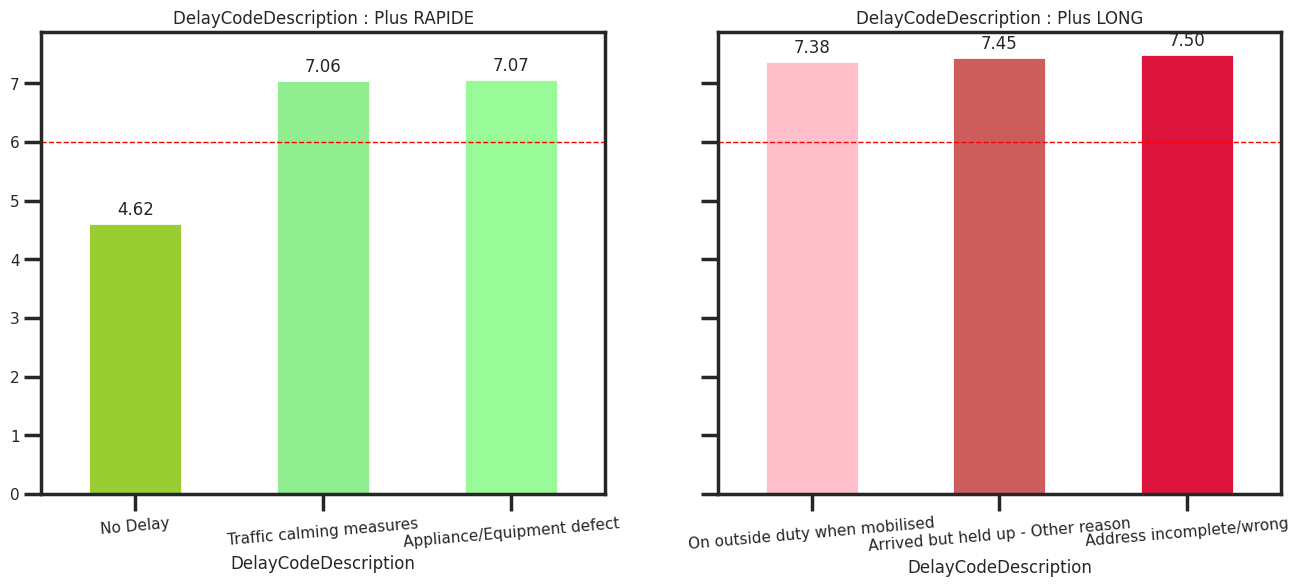

In [ ]:
# Sélection des variables catégorielles en enlevant DateOfCall
columns = cat_var.columns

# Format du texte
font = {
        'color':  'k',
        'weight': 'bold',
        'size': 30,
        }

# Traçage du graphique
for col in columns :

  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6),sharey=True)

  if len(df.groupby(col)["AttendanceTime"].median().sort_values()) > 4 :
    df.groupby(col)["AttendanceTime"].median().sort_values()[:3].plot(kind="bar",ax=ax1,title= str(col) + " : Plus RAPIDE",rot=5,color=["yellowgreen","lightgreen","palegreen"])
    ax1.bar_label(ax1.containers[0],fmt='%.2f', padding=3)
    df.groupby(col)["AttendanceTime"].median().sort_values()[-3:].plot(kind="bar",ax=ax2,title= str(col) +" : Plus LONG",rot=5,color=["pink","indianred","crimson"])
    ax2.bar_label(ax2.containers[0],fmt='%.2f', padding=3)

    # Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse sur les deux graphiques
    ax1.axhline(y=6, color='r', linestyle='--',  linewidth=1,label='Seuil supérieur')
    ax2.axhline(y=6, color='r', linestyle='--',  linewidth=1,label='Seuil supérieur')

  else :
    df.groupby(col)["AttendanceTime"].median().sort_values()[:3].plot(kind="bar",ax=ax1,title= str(col) + " : Plus RAPIDE",rot=5,color=["yellowgreen","lightgreen","palegreen"])
    ax1.bar_label(ax1.containers[0],fmt='%.2f', padding=3)
    ax2.text(x= 0.3, y=3, s="No More data",fontdict=font)


<b> NOTES :</b> <br>
  Nos graphiques nous permettent d'évaluer l'impact des variables catégorielles sur le temps d'intervention médian. Les graphiques sont divisés en deux sous-graphiques : l'un montrant les catégories associées aux temps d'intervention les plus rapides et l'autre montrant les catégories associées aux temps d'intervention les plus longs. Les barres colorées indiquent les catégories, et les étiquettes de barre affichent les valeurs médianes du temps d'intervention. Les graphiques permettent de visualiser rapidement l'impact des différentes catégories sur le temps d'intervention médian.

  Après analyse de ces graphiques, nous visualisons les données suivantes:
- Les incidents de type Feu prennent plus de temps (5.08 min).
- Les feux de cheminée prennent environ 5.35 min.
- Les incidents avec des voitures ont le temps le plus long (5.13 min).
- Les incidents dans les silos prennent beaucoup de temps (10.25 min).
- Les incidents sur une autoroute prennent plus de temps (6.52 min).
- L’arrondissement de Hillington a le temps le plus long (5.82 min).
- Quand les pompiers viennent de la station Ruislip, ça prend plus de temps (6.63 min).
- Quand les pompiers viennent d’une autre station, ça prend aussi plus de temps (5.37 min).
- La ressource C42 a un temps long (9.95 min).
- Quand l’adresse est incomplète ou incorrecte, ça prend plus de temps (7.50 min).

##### Création d'une variable Month et Saison

In [ ]:
# Réinitialisation de l'index du dataframe
df = df.reset_index()

# Définition d'un dictionnaire des saisons
Saison = {
   "Spring" : [3,4,5],
    "Summer" : [6,7,8],
    "Autumn" : [9, 10,11],
    "Winter" : [12, 1,2]}

# Fonction pour faire du mapping
def argcontains(item):
    for i, v in Saison.items():
        if item in v:
            return i

# Extraction du jour et le mois de la colonne "DateOfCall"
df["DayOfTheCall"] = df["DateOfCall"].dt.dayofweek
df["MonthOfTheCall"] = df["DateOfCall"].dt.month.astype("O")

# Récupération de la saison
df["Saison"]= df["MonthOfTheCall"].map(argcontains)
df.sample(2)

,DateOfCall,AttendanceTime,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,NumPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,TurnoutTime,TravelTime,DelayCodeDescription,DayOfTheCall,MonthOfTheCall,Saison
570040,2021-06-23,4.67,12,Special Service,Special Service - Assistance,Non Residential,Non Residential - Medical,Within same building,Hammersmith and Fulham,Fulham Reach,51.487046,-0.219912,Hammersmith,Home Station,1.0,1.0,No Second pump deloyed,1.0,G361,1.08,3.58,No Delay,2,6,Summer
84496,2010-07-02,7.50,17,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Grassland/ pasture/ grazing etc,Open Land/Water,Harrow,Belmont,51.609315,-0.308589,Stanmore,Home Station,1.0,1.0,No Second pump deloyed,1.0,G221,0.62,6.88,No Delay,4,7,Summer


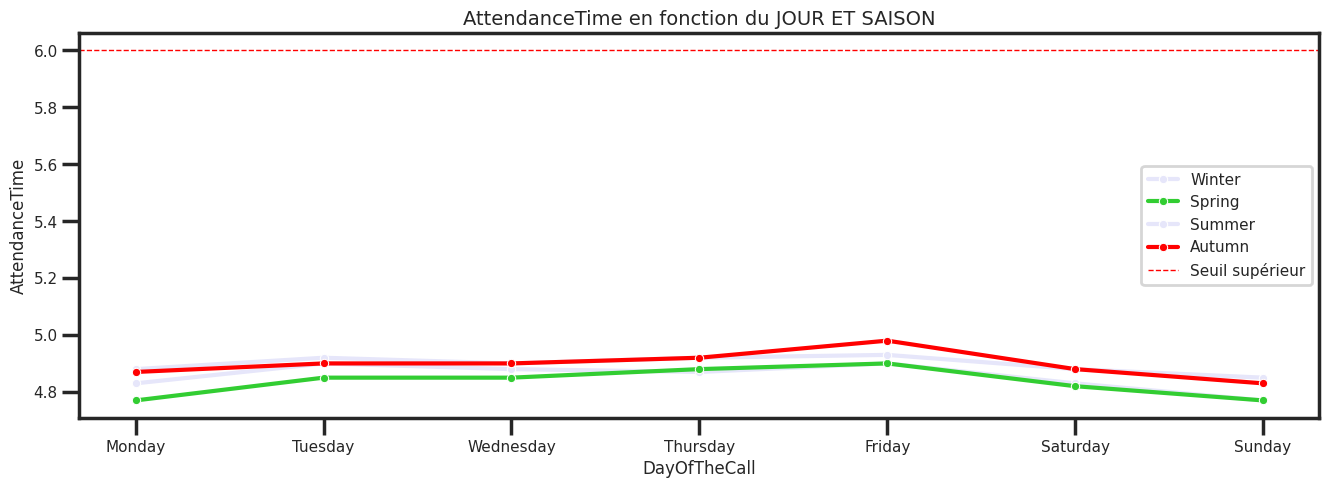

In [ ]:
# Traçage d'une courbe d'AttendanceTime en fonction de Jour, chaque saison étant représentée par une couleur différente.
medians = df.groupby('Saison')['AttendanceTime'].median()
highest_season = medians.idxmax()
lowest_season = medians.idxmin()

palette = {season: 'red' if season == highest_season else 'limegreen' if season == lowest_season else 'lavender' for season in df['Saison'].unique()}
plt.figure(figsize=(16,5))
sns.lineplot(data=df,x="DayOfTheCall",y="AttendanceTime",hue="Saison",ci=None,marker=".",estimator=np.median,palette=palette)

# Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse
plt.axhline(y=6, color='r', linestyle='--', linewidth=1, label='Seuil supérieur')

plt.title("AttendanceTime en fonction du JOUR ET SAISON",fontsize=14)
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.legend();

<b> NOTES :</b> <br>
   L'analyse du temps de réponse en fonction du jour et de la saison montre que:
   - Le printemps semble être la saison où les pompiers interviennent le plus vite et l'automne la saison ou ils mettent plus de temps.

##### Création d'une variable Région

In [ ]:
# Création d'un dictionnaire des régions et de leurs arrondissements respectifs.
Region = {
    "Center": ["Camden","Islington","Westminster","Lambeth","Southwark","Kensington and Chelsea","City of London"],
    "East" : ["Hackney","Waltham Forest","Redbridge","Tower Hamlets","Lewisham","Greenwich","Bexley","Barking and Dagenham","Havering","Newham"],
    "North" : ["Barnet","Enfield","Haringey"],
    "South" : ["Wandsworth","Kingston upon Thames","Merton","Sutton","Croydon","Bromley"],
    "West" :["Hammersmith and Fulham","Brent","Ealing","Richmond upon Thames","Hounslow","Harrow","Hillingdon"]
}

# Fonction pour faire du mapping
def argcontains(item):
    for i, v in Region.items():
        if item in v:
            return i

# Cette ligne de code ajoute une nouvelle colonne "Region" au dataframe df.
df["Region"]= df["BoroughName"].map(argcontains)

df.sample(2)

,DateOfCall,AttendanceTime,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,NumPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,TurnoutTime,TravelTime,DelayCodeDescription,DayOfTheCall,MonthOfTheCall,Saison,Region
642093,2023-01-24,4.33,18,Fire,Fire - Primary Fire,Residential,Residential - Boarding House/B&B for homeless/...,Correct incident location,Croydon,Norbury Park,51.411913,-0.109556,Norbury,Home Station,1.0,2.0,Norbury,1.0,H322,0.98,3.35,No Delay,1,1,Winter,South
482451,2019-04-30,5.67,15,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Hedge,On land associated with building,Tower Hamlets,Poplar,51.509525,-0.008746,Millwall,Home Station,1.0,1.0,No Second pump deloyed,1.0,F231,0.78,4.88,No Delay,1,4,Spring,East


In [ ]:
# Affichage du nombre de lignes uniques dans la colonne "Region" .
df["Region"].value_counts()

East      190249
Center    178280
West      128891
South      93923
North      58253
Name: Region, dtype: int64

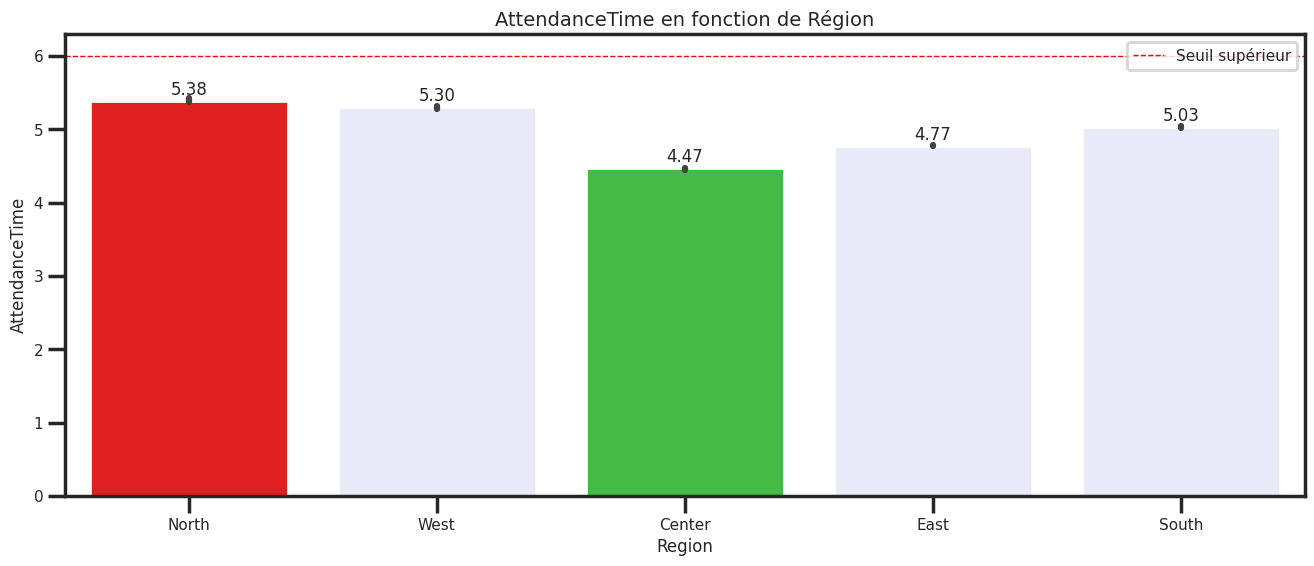

In [ ]:
# Création d'un graphique à barres de la médiane d'AttendanceTime pour chaque région.
medians = df.groupby('Region')['AttendanceTime'].median()
highest_region = medians.idxmax()
lowest_region = medians.idxmin()

palette = {region: 'red' if region == highest_region else 'limegreen' if region == lowest_region else 'lavender' for region in df['Region'].unique()}
fig,ax = plt.subplots(figsize=(16,6))
sns.barplot(data=df, x="Region",y="AttendanceTime",estimator=np.median,palette=palette)

# Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse
plt.axhline(y=6, color='r', linestyle='--', linewidth=1, label='Seuil supérieur')

ax.set_title("AttendanceTime en fonction de Région",fontsize=14)
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f', padding=2)

plt.legend();

<b> NOTES :</b> <br>
   - En ce qui concerne le temps de réponse en fonction de la région, nous notons que les pompiers arrivent plus rapidement au centre et mettent plus de temps pour arriver dans la région du Nord
   

#### 7B. Intéraction de la variable cible avec les variables numériques

In [ ]:
int_var.sample(3)

,AttendanceTime,HourOfCall,LatitudeIncident,LongitudeIncident,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls,TurnoutTime,TravelTime
1216646,3.15,8,51.473030,-0.162399,1.0,1.0,1.0,0.47,2.68
1191523,5.72,21,51.335298,-0.012100,1.0,1.0,1.0,1.15,4.57
709694,4.52,11,51.521995,-0.148132,1.0,1.0,2.0,0.68,3.83


##### AttendanceTime / HourOfCall

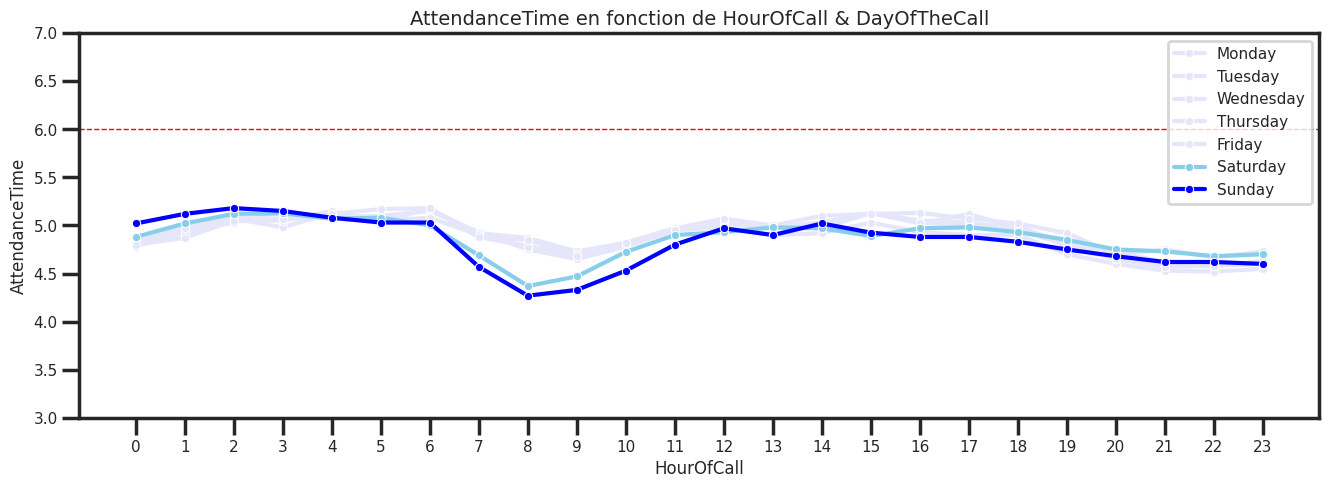

In [ ]:
# Création d'une courbe d'AttendanceTime en fonction de HourOfCall et Jour, avec chaque jour de la semaine représenté par une couleur différente.
fig,ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=df,x="HourOfCall",y="AttendanceTime",hue="DayOfTheCall",ci=None,marker=".",estimator=np.median,palette=["lavender","lavender","lavender","lavender","lavender","skyblue","blue"])

# Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse
plt.axhline(y=6, color='r', linestyle='--', linewidth=1, label='Seuil supérieur')

ax.set_title("AttendanceTime en fonction de HourOfCall & DayOfTheCall",fontsize=14)
plt.legend(labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],loc="upper right")
x=[x for x in range(0,24)]
plt.xticks(x)
plt.ylim(3,7);


In [ ]:
# Création d'nouvelle colonne HourOfCallCut qui regroupe les heures d'appel en cinq catégories
df["MomentOfTheDay"] = pd.cut(df["HourOfCall"], bins=[-1, 3, 6, 12, 18, 21, 24], labels=["Late Night", "Early Morning", "Morning", "Afternoon", "Early Evening", "Late Evening"], right=True)
df["MomentOfTheDay"].value_counts()

Afternoon        215167
Morning          180455
Early Evening    102047
Late Night        63735
Late Evening      51678
Early Morning     36514
Name: MomentOfTheDay, dtype: int64

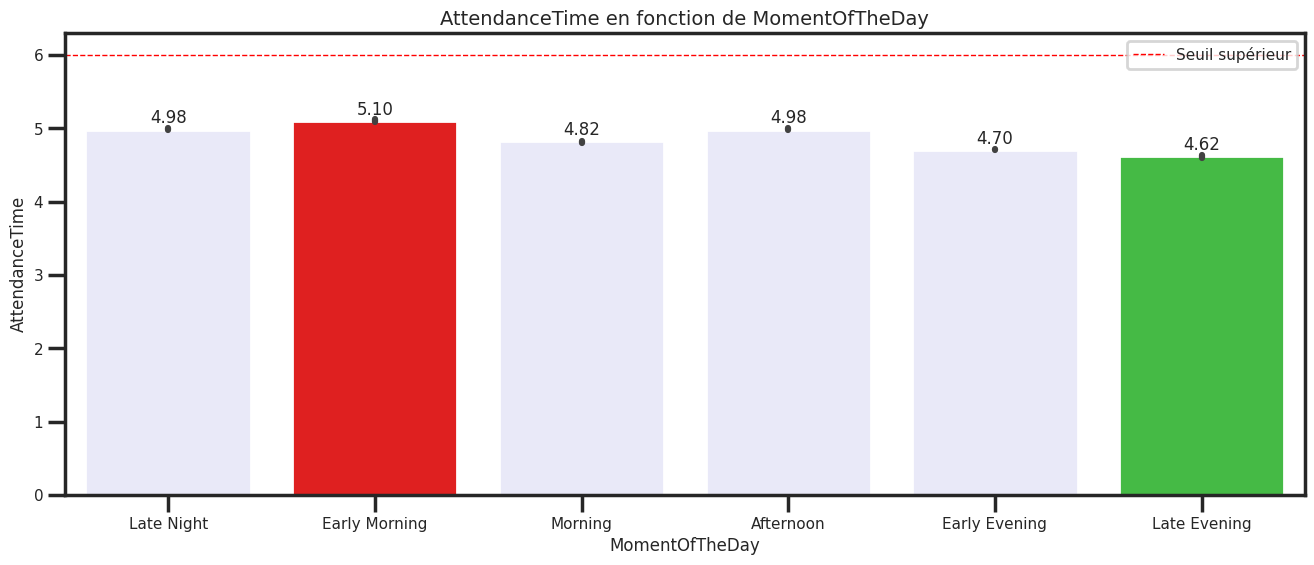

In [ ]:
# Création d'un graphique à barres de la médiane d'AttendanceTime pour chaque HourOfCallCut.
medians = df.groupby('MomentOfTheDay')['AttendanceTime'].median()
highest_Hour= medians.idxmax()
lowest_Hour = medians.idxmin()

palette = {MomentOfTheDay: 'red' if MomentOfTheDay == highest_Hour else 'limegreen' if MomentOfTheDay == lowest_Hour else 'lavender' for MomentOfTheDay in df['MomentOfTheDay'].unique()}
fig,ax = plt.subplots(figsize=(16,6))
sns.barplot(data=df, x="MomentOfTheDay",y="AttendanceTime",estimator='median',palette=palette)

# Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse
plt.axhline(y=6, color='r', linestyle='--', linewidth=1, label='Seuil supérieur')

ax.set_title("AttendanceTime en fonction de MomentOfTheDay",fontsize=14)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f', padding=2)

plt.legend();


- Late Night : 00:00 à 02:59,
- Early Morning : 03:00 à 05:59,
- Morning : 06:00 à 11:59,
- Afternoon :  12:00 à 17:59,
- Early Evening : 18:00 à 20:59
- Late Evening : 21:00 à 23:59.

<b> NOTES :</b> <br>
   On observe que le temps d'intervention est plus long tôt le matin de 03:00 à 05:59 et très court en fin de soirée de 21:00 à 23:59

In [ ]:
# On tag s'il fait nuit ou non

def is_night(hour):
    if (hour < 8) or (hour >= 17):
        return 1
    else:
        return 0

df["IsNight"] = df["HourOfCall"].apply(is_night)

In [ ]:
df.head(1)

,DateOfCall,AttendanceTime,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,NumPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,TurnoutTime,TravelTime,DelayCodeDescription,DayOfTheCall,MonthOfTheCall,Saison,Region,MomentOfTheDay,IsNight
0,2009-01-01,5.13,0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Road surface/pavement,Street,Enfield,Haselbury,51.633342,-0.068488,Edmonton,Home Station,1.0,1.0,No Second pump deloyed,2.0,A341,2.52,2.62,No Delay,3,1,Winter,North,Late Night,1


##### AttendanceTime / Variables numériques

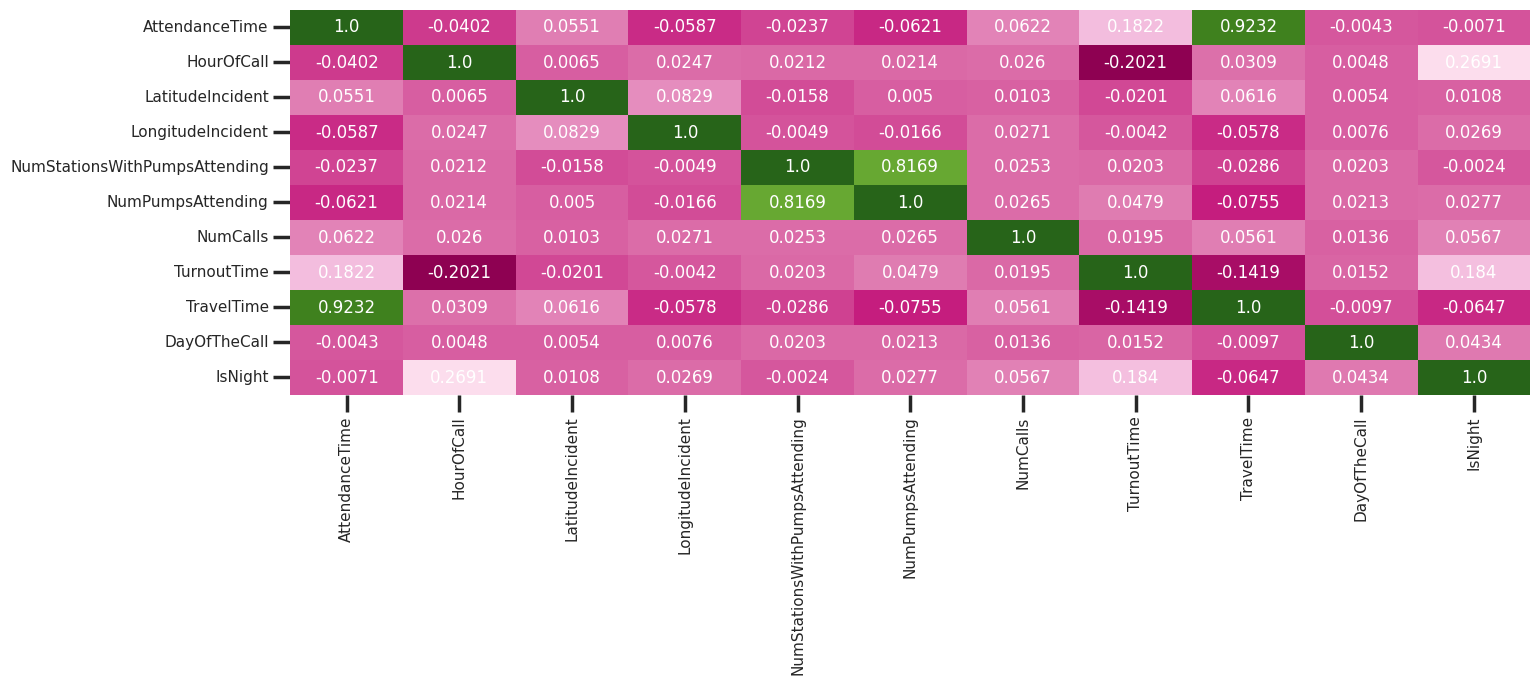

In [ ]:
### Nous avons rencontré des problèmes avec le paramètre “annot” de sns.heatmap,
### ce qui a nécessité l’ajout d’annotations via une boucle.


# Calcul de la corrélation de Spearman
corr = df.corr(method = "spearman")

# Création de la figure
fig, ax = plt.subplots(figsize=(16, 5))

# Création de la heatmap
sns.heatmap(corr, cmap="PiYG", cbar= False)

# Boucle pour calculer et annoter les corrélations sur la heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j+0.5, i+0.5, round(corr.iloc[i, j], 4),
                ha="center", va="center", color="white")

plt.show()

<b> NOTES :</b> <br>
Suite à l'examen des corrélations entre diverses variables, nous avons identifié les deux observations suivantes :

- Il existe une forte corrélation entre le temps de réponse et le temps de déplacement jusqu'au lieu d'intervention.
- Le nombre de pompiers semble être fortement lié au nombre de stations déployées sur le lieu d'intervention.

In [ ]:
# On enlève TurnoutTime et TravelTime car on ne connait pas à l'avance le temps de préparation et
# déplacements des pompiers lors d'une intervention.

df.drop(["NumPumpsAttending","TravelTime","TurnoutTime"],axis=1,inplace=True)
df.sample(2)

,DateOfCall,AttendanceTime,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,DelayCodeDescription,DayOfTheCall,MonthOfTheCall,Saison,Region,MomentOfTheDay,IsNight
370527,2016-11-01,6.23,5,False Alarm,False Alarm - Automatic Fire Alarm,Residential,Residential - Hotel/motel,Correct incident location,Westminster,West End,51.513929,-0.157294,Soho,Home Station,1.0,No Second pump deloyed,2.0,A242,No Delay,1,11,Autumn,Center,Early Morning,1
125196,2011-04-14,1.95,14,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Non Residential - Education,Correct incident location,Lambeth,Streatham Common & Vale,51.412540,-0.135330,Norbury,Home Station,1.0,No Second pump deloyed,1.0,H322,No Delay,3,4,Spring,Center,Afternoon,0


In [ ]:
print("Nombre de doublons avant : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Nombre de doublons après : ", df.duplicated().sum())

Nombre de doublons avant :  9
Nombre de doublons après :  0


In [ ]:
# Enregistrement du dataframe
df.to_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_Analysé.csv", encoding='utf-8', index=False)

# 8. Feature Engineering : Distance entre le lieu de l'incident et la station déployée

#### 8A. Récupération de Latitude, Longitude de la station

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_Analysé.csv")
print(df.shape)

(649587, 25)


In [ ]:
# Création d'une instance de ChromeDriver pour contrôler le navigateur Chrome
#driver = webdriver.Chrome()

# Accès à la page web des stations de pompiers de Londres
#driver.get("https://www.ukfirestations.co.uk/stations/london/")

In [ ]:
# Création d'un objet BeautifulSoup à partir du code source de la page web
#soup = BeautifulSoup(driver.page_source,"html.parser")

# Création d'une une liste vide pour stocker les noms des stations
#stations =[]

# Parcours de tous les éléments HTML qui ont la classe "station-name has-gs has-ga"
#for texte in soup.find_all(class_="station-name has-gs has-ga"):

    # Ajout du texte de l'élément à la liste des stations, en supprimant les espaces inutiles
    #stations.append(texte.text.strip())

In [ ]:
# Création d'une liste vide pour stocker les adresses des stations
#adresse = []

# Parcours de la liste des noms de stations
#for a in stations:
    #driver.find_element(By.LINK_TEXT, a).click()
    #soup2 = BeautifulSoup(driver.page_source,"html.parser")
    #ad = soup2.find(id="station-details").text.strip()
    #adresse.append(ad)
    #driver.back()

In [ ]:
#data = {
    #"DeployedFromStation_Name" : stations,
    #"Full Adress" : adresse
#}

#df_station  = pd.DataFrame(data)

#Enregistrement du dataFrmane en format CSV
#df_station.to_csv("Stations_FullAdress.csv", encoding='utf-8', index=False)

In [ ]:
# Lecture du fichier CSV contenant les données webscrappées
df_station = pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/Stations_FullAdress.csv")

df_station.head()

,DeployedFromStation_Name,Full Adress
0,Acton,BrigadeLondon Fire Brigade\nStatusWholetime\nA...
1,Addington,BrigadeLondon Fire Brigade\nStatusWholetime\nA...
2,Barking,BrigadeLondon Fire Brigade\nStatusWholetime\nA...
3,Barnet,BrigadeLondon Fire Brigade\nStatusWholetime\nA...
4,Battersea,BrigadeLondon Fire Brigade\nStatusWholetime\nA...


In [ ]:
# Conversion de la colonne 'Full Adress' en type chaîne de caractères
df_station['Full Adress'] = df_station['Full Adress'].astype(str)

# Extraction de la partie de la chaîne qui commence par 'Ad' et se termine par 'A'
df_station['Full Adress'] = df_station['Full Adress'].str.extract('(Ad.*\nA)')

# Remplacement du mot 'Address' par une chaîne vide
df_station['Full Adress'] = df_station['Full Adress'].str.replace("Address","")

# Extraction de la partie de la chaîne qui contient les deux premières virgules
df_station['Full Adress'] = df_station['Full Adress'].str.extract('^([^,]*,[^,]*),.*')

# Suppresion des espaces blancs au début et à la fin de la chaîne
df_station['Full Adress'] = df_station['Full Adress'].str.strip()

df_station.head()

,DeployedFromStation_Name,Full Adress
0,Acton,"27 Gunnersbury Lane, Acton"
1,Addington,"197 - 199 Lodge lane, Addington"
2,Barking,"Alfreds Way, Barking"
3,Barnet,"144 Station Road, Barnet"
4,Battersea,"11 Este Road, Battersea"


#### 8B. Conversion de l'adresse en lattitude et longitude

In [ ]:
# Création de deux listes vides pour stocker les coordonnées géographiques
latitude = []
longitude = []

# Parcours des éléments de la colonne 'Full Adress' _station
for element in df_station['Full Adress'] :

    try :
        loc = Nominatim(user_agent='my_request')
        getLoc = loc.geocode(element)
        latitude.append(getLoc.latitude)
        longitude.append(getLoc.longitude)

    except:
        # En cas d'erreur, ajouter une valeur manquante aux listes
        latitude.append(np.nan)
        longitude.append(np.nan)

In [ ]:
# Création d'un dictionnaire avec les clés "LatitudeStation" et "LongitudeStation" et les valeurs correspondant aux variables latitude et longitude
data = {
    "LatitudeStation" : latitude,
    "LongitudeStation" : longitude
}

# Création d'un DataFrame à partir du dictionnaire data
df_coord  = pd.DataFrame(data)

# Concaténation des objets DataFrame df_station et df_coord le long de l'axe des colonnes
df_coordStation = pd.concat([df_station,df_coord],axis=1)
df_coordStation.head()

,DeployedFromStation_Name,Full Adress,LatitudeStation,LongitudeStation
0,Acton,"27 Gunnersbury Lane, Acton",51.507054,-0.276920
1,Addington,"197 - 199 Lodge lane, Addington",51.358043,-0.032222
2,Barking,"Alfreds Way, Barking",NaN,NaN
3,Barnet,"144 Station Road, Barnet",51.598307,-0.187419
4,Battersea,"11 Este Road, Battersea",51.467129,-0.168915


In [ ]:
# Remplissage manuel des valeurs manquantes

i = [2,11,12,19,30,32,35,38,48,49,80,84,87,89,102,82,27,22]
lat = [51.529820,51.487233,51.629740,51.510003,51.442390,51.474642,51.594600,51.480183,51.502965,51.552957,51.512489,51.562056,51.369629,51.592905,51.386048,51.631254,51.527723,51.523548]
lng = [0.088809,0.170153,0.003590,0.090206,0.043444,0.012700,0.232900,-0.458630,0.190099,0.142053,0.130081,0.076530,-0.210518,0.074228,0.062230,-0.127368,0.130668,0.056981]

for i,j,k in zip(i,lat,lng):
    df_coordStation.loc[i,"LatitudeStation"] = j
    df_coordStation.loc[i,"LongitudeStation"] = k


In [ ]:
print("Nombre de valeurs nulles:", df_coordStation.isna().sum().sum())
df_coordStation.rename(columns ={"DeployedFromStation_Name":"DeployedFromStationName"},inplace=True)
df_coordStation.sample(3)

Nombre de valeurs nulles: 0


,DeployedFromStationName,Full Adress,LatitudeStation,LongitudeStation
102,Woodside,"2 Long lane, Addiscombe Road",51.386048,0.062230
36,Harrow,"500 Pinner Road, Harrow",51.590802,-0.366348
7,Bexley,"172 Erith Road, Bexleyheath",51.485075,0.155928


#### 8C. Fusion avec la dataset

In [ ]:
# Fusion des dataframes df et df_coordStation
df = df.merge(df_coordStation,on="DeployedFromStationName",how="outer")
print(df.shape)
df.sample(1)

(649588, 28)


,DateOfCall,AttendanceTime,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,DelayCodeDescription,DayOfTheCall,MonthOfTheCall,Saison,Region,MomentOfTheDay,IsNight,Full Adress,LatitudeStation,LongitudeStation
204933,2018-02-11,5.27,16.0,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Non Residential - Public,Correct incident location,Camden,Holborn & Covent Garden,51.520857,-0.107817,Soho,Home Station,1.0,No Second pump deloyed,1.0,A242,No Delay,6.0,2,Winter,Center,Afternoon,0.0,"126 Shaftesbury Avenue, Soho",51.512489,0.130081


In [ ]:
# Supression de la colonne "Full Adress et enregistrement
df.drop("Full Adress",axis=1,inplace=True)

print("Nombre de doublons avant : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Nombre de doublons après : ", df.duplicated().sum())

df.to_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_webScrapLongLat.csv", encoding='utf-8', index=False)

Nombre de doublons avant :  0
Nombre de doublons après :  0


#### 8E. Résolution problème NaN latitude / longitude du lieu de la station

In [ ]:
# Lecture du fichier CSV et stockage des données dans un DataFrame df
#df=pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_webScrapLongLat.csv")

# Affichage du nombre de lignes et de colonnes
print(df.shape)

(649588, 27)


In [ ]:
# Calcul du nombre de valeurs manquantes (NaN) pour chaque colonne
df.isna().sum().sort_values(ascending=False)

LongitudeStation                         21718
LatitudeStation                          21718
NumStationsWithPumpsAttending                1
IsNight                                      1
MomentOfTheDay                               1
Region                                       1
Saison                                       1
MonthOfTheCall                               1
DayOfTheCall                                 1
DelayCodeDescription                         1
ResourceCode                                 1
NumCalls                                     1
SecondPumpArrivingDeployedFromStation        1
DateOfCall                                   1
AttendanceTime                               1
LongitudeIncident                            1
LatitudeIncident                             1
WardName                                     1
BoroughName                                  1
AddressQualifier                             1
PropertyType                                 1
PropertyCateg

In [ ]:
# Suppression des valeurs manquantes
df.dropna(inplace=True)
print("Nombre de valeurs manquantes : ", df.isna().sum().sum())
print(df.shape)

Nombre de valeurs manquantes :  0
(627869, 27)


#### 8F. calcul distance entre la station et le lieu de l'incident

In [ ]:
#https://ichi.pro/fr/voici-comment-calculer-la-distance-entre-2-geolocalisations-en-python-162644696480676

# La distance haversine est la distance angulaire entre deux points sur la surface d’une sphère
# Définir une fonction qui prend en paramètres les latitudes et longitudes de deux points

def haversine_distance(lat1, lon1, lat2, lon2):
   # Définir le rayon de la Terre en kilomètres
   r = 6371

   # Convertir les latitudes et longitudes en radians
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)

   # Calculer la différence de latitude et de longitude en radians
   delta_phi = np.radians(lat2 -lat1)
   delta_lambda = np.radians(lon2 - lon1)

   # Appliquer la formule de haversine pour calculer le terme a
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2

   # Calculer la distance haversine en kilomètres en utilisant le terme a
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 -a)))

   # Arrondir le résultat à deux décimales et le retourner
   return np.round(res, 2)

In [ ]:
# Création de la colonne Distance
df["Distance"]=df.apply(lambda row : haversine_distance((row['LatitudeIncident']),(row['LongitudeIncident']),(row['LatitudeStation']),(row['LongitudeStation'])),axis=1)
df.head().append(df.tail())

,DateOfCall,AttendanceTime,HourOfCall,IncidentGroup,IncidentGroupType,PropertyCategory,PropertyType,AddressQualifier,BoroughName,WardName,LatitudeIncident,LongitudeIncident,DeployedFromStationName,DeployedFromLocation,NumStationsWithPumpsAttending,SecondPumpArrivingDeployedFromStation,NumCalls,ResourceCode,DelayCodeDescription,DayOfTheCall,MonthOfTheCall,Saison,Region,MomentOfTheDay,IsNight,LatitudeStation,LongitudeStation,Distance
0,2009-01-01,5.13,0.0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Road surface/pavement,Street,Enfield,Haselbury,51.633342,-0.068488,Edmonton,Home Station,1.0,No Second pump deloyed,2.0,A341,No Delay,3.0,1,Winter,North,Late Night,1.0,51.625116,-0.060761,1.06
1,2009-01-01,5.20,7.0,Fire,Fire - Secondary Fire,Outdoor,Outdoor - Road surface/pavement,Street,Enfield,Bowes,51.614526,-0.100747,Edmonton,Home Station,1.0,No Second pump deloyed,1.0,A342,No Delay,3.0,1,Winter,North,Morning,1.0,51.625116,-0.060761,3.00
2,2009-01-01,4.90,11.0,Special Service,Special Service - Road Traffic Collision,Vehicle,Vehicle - Car,Street,Enfield,Winchmore Hill,51.623381,-0.102804,Edmonton,Home Station,2.0,Southgate,2.0,A341,No Delay,3.0,1,Winter,North,Morning,0.0,51.625116,-0.060761,2.91
3,2009-01-02,7.53,12.0,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Non Residential - Public,Correct incident location,Enfield,Southbury,51.645206,-0.064283,Edmonton,Home Station,1.0,No Second pump deloyed,2.0,A341,"Traffic, roadworks, etc",4.0,1,Winter,North,Morning,0.0,51.625116,-0.060761,2.25
4,2009-01-02,4.80,17.0,Special Service,Special Service - Road Traffic Collision,Vehicle,Vehicle - Car,Street,Enfield,Upper Edmonton,51.611869,-0.078933,Edmonton,Home Station,1.0,No Second pump deloyed,1.0,A342,No Delay,4.0,1,Winter,North,Afternoon,1.0,51.625116,-0.060761,1.93
649581,2023-03-21,4.70,20.0,False Alarm,False Alarm - Automatic Fire Alarm,Residential,Residential - Retirement/Old Persons Home,Correct incident location,Havering,Harold Wood,51.590798,0.237470,Harold Hill,Home Station,2.0,Hornchurch,1.0,F571,No Delay,1.0,3,Spring,East,Early Evening,1.0,51.594600,0.232900,0.53
649582,2023-03-23,2.50,13.0,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Non Residential - Industry,Correct incident location,Havering,Heaton,51.596579,0.219006,Harold Hill,Home Station,1.0,No Second pump deloyed,1.0,F571,No Delay,3.0,3,Spring,East,Afternoon,0.0,51.594600,0.232900,0.98
649583,2023-03-27,6.00,0.0,Fire,Fire - Primary Fire,Vehicle,Vehicle - Van,On land associated with building,Havering,Gooshays,51.617141,0.219184,Harold Hill,Home Station,1.0,No Second pump deloyed,2.0,F571,No Delay,0.0,3,Spring,East,Late Night,1.0,51.594600,0.232900,2.68
649584,2023-03-27,4.83,1.0,Special Service,Special Service - Assistance,Outdoor,Outdoor - Railings,Street,Havering,Gooshays,51.609123,0.229258,Harold Hill,Home Station,1.0,No Second pump deloyed,1.0,F571,No Delay,0.0,3,Spring,East,Late Night,1.0,51.594600,0.232900,1.63
649585,2023-03-31,4.13,14.0,False Alarm,False Alarm - Automatic Fire Alarm,Non Residential,Non Residential - Entertainment,Within same building,Havering,Heaton,51.594557,0.217189,Harold Hill,Home Station,2.0,Romford,1.0,F571,No Delay,4.0,3,Spring,East,Afternoon,0.0,51.594600,0.232900,1.09


#### 8G. Distribution de la variable distance

min        0.00
mean      64.79
max     7728.42
Name: Distance, dtype: float64

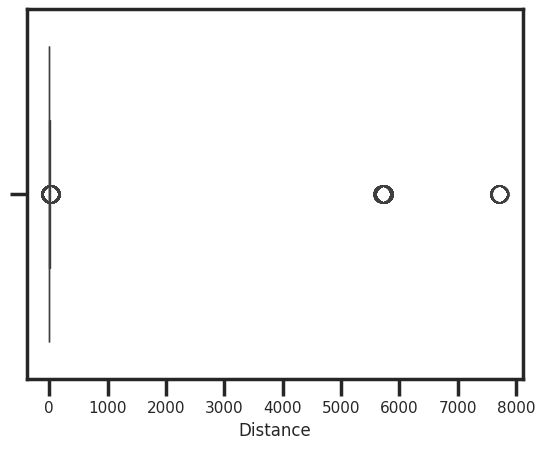

In [ ]:
#Affichage des statistiques descriptives de la colonne "Distance"
display(df["Distance"].describe().T.round(2)[["min","mean","max"]])

# Affichage de la distribution de la variable 'Distance' avant élimination des outliers
sns.boxplot(data=df, x = "Distance");

In [ ]:
# Calcul Q1 et Q3
Q1 = df["Distance"].quantile(0.25)
Q3 = df["Distance"].quantile(0.75)

# Calcul IQR (Inter Quartile Range)
IQR = Q3 - Q1

# Définition des limites pour les outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Filtrage dees valeurs qui sont dans l'intervalle [borne_inf, borne_sup]
df = df[(df["Distance"] >= borne_inf) & (df["Distance"] <= borne_sup)]

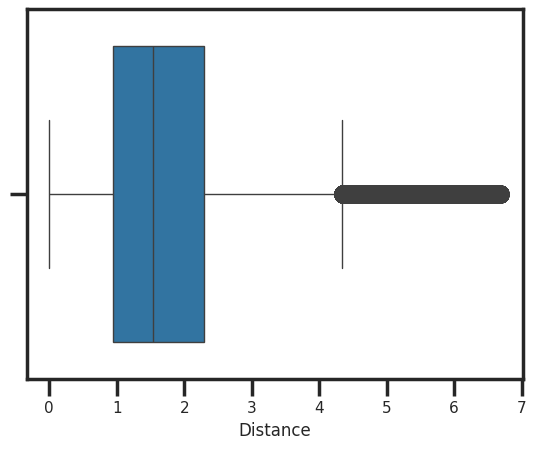

In [ ]:
# Affichage de la distribution de la variable 'Distance' après élimination des outliers
sns.boxplot(data=df,x="Distance");

In [ ]:
print("Nombre de doublons avant : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Nombre de doublons après : ", df.duplicated().sum())

Nombre de doublons avant :  0
Nombre de doublons après :  0


In [ ]:
df.to_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_SampleDistanceOK.csv", encoding='utf-8', index=False)

#### 8H. Relation entre la DISTANCE et la variable cible

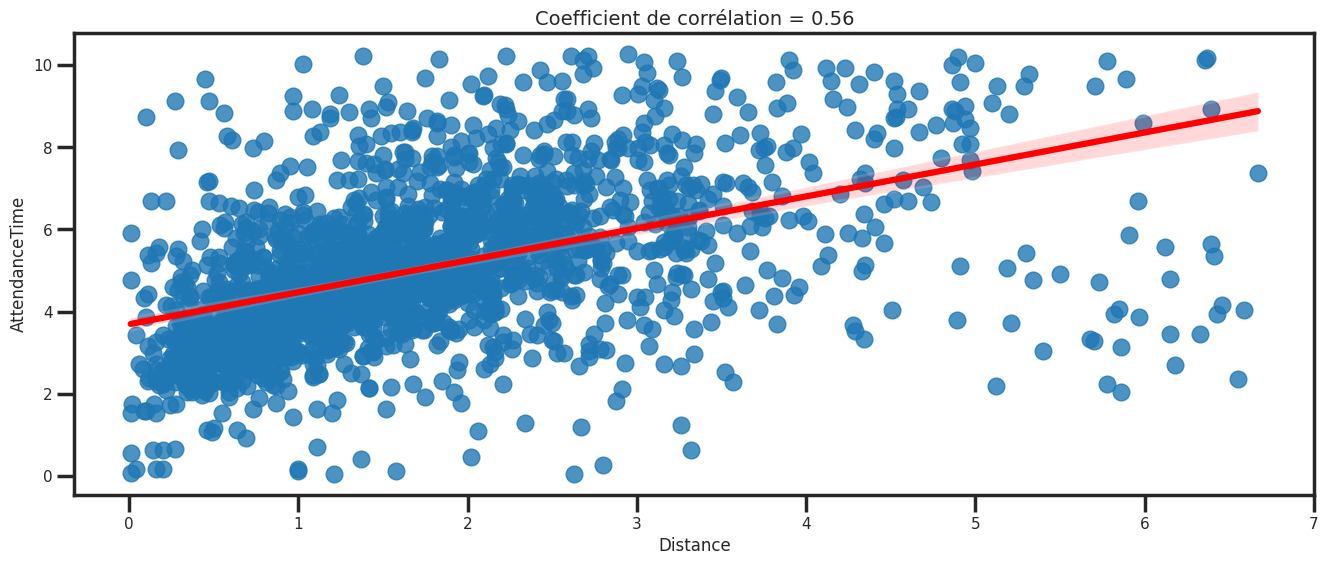

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/DataFrames intermédiaires/df_SampleDistanceOK.csv")

#Echantillonnage pour ne pas surcharger le graphique
df_dist = df.sample(2000)
fig, ax = plt.subplots(figsize=(16,6))
sns.regplot(data=df_dist, x="Distance", y="AttendanceTime", line_kws={"color":"red"})

corr, _ = spearmanr(df_dist["Distance"], df_dist["AttendanceTime"])
ax.set_title("Coefficient de corrélation = {:.2f}".format(corr), fontsize=14);

In [ ]:
from scipy.stats import spearmanr

# Calcul de la corrélation de rang de Spearman et la valeur p entre AttendanceTime et la distance
rho, p = spearmanr(df["AttendanceTime"], df['Distance'])
print("Spearman rank correlation : ",round(rho,2))
print("p_value :",p)

Spearman rank correlation :  0.56
p_value : 0.0


<b> NOTES :</b> <br>
   - Un test statistique montre une correlation moyenne entre ces 2 variables (r=0.56)

In [ ]:
df["DistanceCategory"] = pd.cut(df["Distance"], bins = [0, 1, 3, 5, 7], labels=["Very close", "Close", "Medium", "Far"], right=False)
df["DistanceCategory"].value_counts()

Close         310128
Very close    142710
Medium         54173
Far             9361
Name: DistanceCategory, dtype: int64

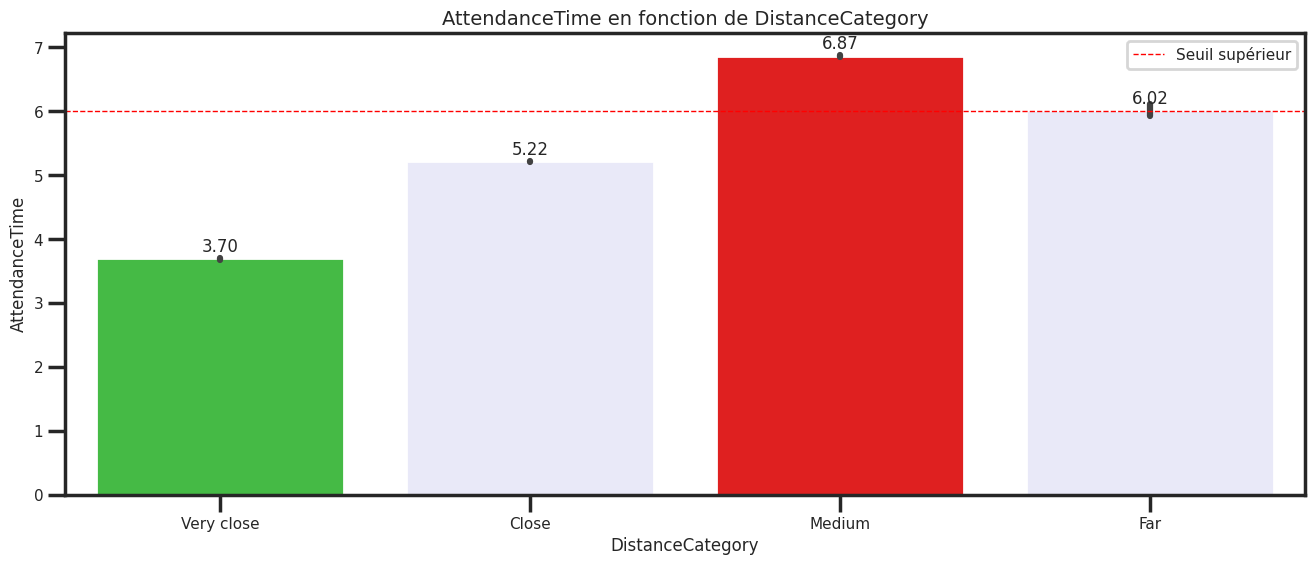

In [ ]:
# Création d'un graphique à barres de la médiane d'AttendanceTime pour chaque Range Distance.
medians = df.groupby('DistanceCategory')['AttendanceTime'].median()
highest_Distance= medians.idxmax()
lowest_Distance = medians.idxmin()

palette = {DistanceCategory: 'red' if DistanceCategory == highest_Distance else 'limegreen' if DistanceCategory == lowest_Distance else 'lavender' for DistanceCategory in df['DistanceCategory'].unique()}
fig,ax = plt.subplots(figsize=(16,6))
sns.barplot(data=df, x="DistanceCategory",y="AttendanceTime",estimator='median',palette=palette)

# Ajout d'une ligne en pointillé rouge pour le seuil supérieur du temps de réponse
plt.axhline(y=6, color='r', linestyle='--', linewidth=1, label='Seuil supérieur')

ax.set_title("AttendanceTime en fonction de DistanceCategory",fontsize=14)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f', padding=2)

plt.legend();


#### 8I. Visualisation cartographique : BoroughName / Incidents / Stations / AttendanceTime

In [ ]:
dataset_carto = df[["BoroughName","AttendanceTime","LatitudeStation","LongitudeStation","LatitudeIncident","LongitudeIncident","DeployedFromStationName"]]
dataset_carto.sample(5)

,BoroughName,AttendanceTime,LatitudeStation,LongitudeStation,LatitudeIncident,LongitudeIncident,DeployedFromStationName
440672,Islington,4.20,51.540267,-0.102307,51.544738,-0.097553,Islington
251507,Waltham Forest,2.53,51.606148,0.046544,51.607611,0.018792,Woodford
540210,Bexley,3.13,51.485075,0.155928,51.464255,0.156833,Bexley
363505,City of London,4.67,51.515305,-0.069189,51.518197,-0.079690,Whitechapel
182665,Newham,3.28,51.523548,0.056981,51.514991,0.060903,East Ham


In [ ]:
 # Échantillonnage aléatoire de 400 000 lignes
dataset_carto = dataset_carto.sample(400000)

In [ ]:
import json
# Chargement du fichier JSON contenant les arrondissements de Londres
london_borough = json.load(open('/content/drive/MyDrive/jun23_cda_pompiers/Exploration de données/Datasets/london_boroughs.json',"r"))

In [ ]:
# Calcul des médianes des temps d'intervention, latitudes et longitudes par arrondissement
df_carto_Incident = dataset_carto.groupby("BoroughName").agg({"AttendanceTime": np.median,
                                          "LatitudeIncident": np.median,
                                          "LongitudeIncident":np.median}).reset_index()

# Affichage des 5 premières lignes du nouveau DataFrame
df_carto_Incident.head()

,BoroughName,AttendanceTime,LatitudeIncident,LongitudeIncident
0,Barking and Dagenham,5.28,51.540843,0.130893
1,Barnet,5.39,51.605413,-0.208228
2,Bexley,5.27,51.463205,0.144124
3,Brent,5.43,51.552206,-0.264309
4,Bromley,5.68,51.390942,0.015946


In [ ]:
# Uniformisation des noms des arrondissements entre les 2 dataframes
df_carto_Incident["BoroughName"].replace(to_replace =["Kingston Upon Thames","Waltham Forestt","Richmond Upon Thames" ,"Hammersmith And Fulham","Kensington And Chelsea",
                                             "Tower Hamletss","Barking And Dagenham","City Of London"],value=["Kingston upon Thames","Waltham Forest",
                                                                                                             "Richmond upon Thames","Hammersmith and Fulham",
                                                                                                             "Kensington and Chelsea","Tower Hamlets","Barking and Dagenham","City of London"],
                                inplace=True)

In [ ]:
# Initialisation d'un dictionnaire vide pour stocker les correspondances entre les noms et les identifiants des arrondissements
borough_name_map = {}

for feature in london_borough["features"]:

  try :
    feature["id"] = feature["properties"]["id"]

    # Ajout de la correspondance nom-identifiant au dictionnaire
    borough_name_map[feature["properties"]["name"]]=feature["id"]

  except :
    print("error")

In [ ]:
# Ajout d'une nouvelle colonne "id" au DataFrame df_carto_Incident, contenant les identifiants des arrondissements de Londres
df_carto_Incident["id"]=df_carto_Incident["BoroughName"].apply(lambda x : borough_name_map[x])

# Affichage des 5 premières lignes du nouveau DataFrame
df_carto_Incident.head()

,BoroughName,AttendanceTime,LatitudeIncident,LongitudeIncident,id
0,Barking and Dagenham,5.28,51.540843,0.130893,32
1,Barnet,5.39,51.605413,-0.208228,10
2,Bexley,5.27,51.463205,0.144124,15
3,Brent,5.43,51.552206,-0.264309,9
4,Bromley,5.68,51.390942,0.015946,3


In [ ]:
'''
Ce code utilise la bibliothèque Plotly Express pour créer une carte choroplèthe sur une carte Mapbox.
Les données sont stockées dans un DataFrame pandas et sont utilisées pour créer une carte choroplèthe.
Les données géographiques sont stockées dans un fichier GeoJSON et sont utilisées pour dessiner les limites des zones géographiques.
Les données de couleur sont utilisées pour déterminer la couleur de chaque zone géographique.
Le nom de chaque zone géographique est affiché lorsqu'un utilisateur survole la zone avec la souris.
'''

fig = px.choropleth_mapbox(df_carto_Incident,locations="id", # Identifiant de l'emplacement
                    geojson=london_borough, # Données géographiques
                    color="AttendanceTime", # Données de couleur
                    mapbox_style="carto-positron", # Style de la carte
                    hover_name="BoroughName", # Nom de la zone survolée
                    color_continuous_scale="Temps") # Échelle de couleur


# MàJ de la carte pour qu'elle s'adapte aux emplacements des incidents
fig.update_geos(fitbounds="locations", visible=False)

# Ajout d'une carte de dispersion pour afficher les stations
fig.add_scattermapbox(
    lat = dataset_carto.LatitudeStation,
    lon = dataset_carto.LongitudeStation
)

# MàJ de la mise en page de la carte
fig.update_layout(title='London Borough Attendance Time')
fig.update_layout(mapbox_zoom=9, mapbox_center = {"lat": 51.490065, "lon": -0.119092})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# MàJ des traces de la carte avec la couleur des points
fig.update_traces(marker_color="black", selector=dict(type='scattermapbox'))
fig.update_traces(text=dataset_carto.DeployedFromStationName, selector=dict(type='scattermapbox'))

# AAffichage de la carte
fig.show()

Output hidden; open in https://colab.research.google.com to view.

<b> NOTES :</b> <br>
   A travers cette carte et comme observé dans les chapitres précédants,on note que plus on s'éloigne du centre de Londres plus le temps d'intervention est plus élevé.
